This is adapted from team 17, CHACK

# **0** Necessary Imports and Connecting Google Drive

The following imports are necessary for the appropriate functioning of code further in this notebook. Please make sure to run the next code cell so no runtime errors occur later on.

In [ ]:
#Import Pandas for dataframes
import pandas as pd

#Import numpy for general purposes
import numpy as np

#Import stats from scipy for outlier identification
from scipy import stats

#Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

#Import datetime to manipulate datetime type
import datetime

The following code cells mount the team folder drive to the notebook and load the correct data folder, allowing access to (and loading) the required data/files. Please make sure the run the next code cells so no runtime errors occur later on.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
%pwd 
%cd "/content/drive/MyDrive/C-HACK 2021 EVALUATION/Team 17"
#'/content/drive/MyDrive/Team 17 - TemporaryName2'

/content/drive/.shortcut-targets-by-id/1PQXZ1RNI7_sPl_HjpW_L1emfX7xOs2Nb/C-HACK 2021 EVALUATION/Team 17


In [ ]:
dow_training_data_path = '../ImpurityTraining.csv'
dow_testing_data_path = '../ImpurityTesting.csv'

# **1** Data Analysis

This section comprises all preliminary data analysis and comparisons. These analyses will be carried out with the goal of identifying significant factors in the build-up of impurity in the distillation process.

##**1.1** Loading and Formating Data

First, we load the data into a pandas dataframe to get a sense of what it looks like and any glaring trends/relations we might be able to determine. Since we aren't doing any regression, we can combine the two datasets into one complete dataset. Furthermore, combining the two datasets should not cause any datetime-index issues since no two datetimes are the same. (TrainingData ends on 11pm Feb 18, 2017, TestingData starts on 12am Feb 19, 2017)

In [ ]:
#Generate the dataframes for each of the datasets, with the 'Date' column
#set as the index (index_col=0, col[0] was 'Date', now set as index), then
#changes the index (now 'Date') into a pandas datetime object (parse_dates=True)
training_df = pd.read_csv(dow_training_data_path,index_col=0,parse_dates=True)
testing_df = pd.read_csv(dow_testing_data_path,index_col=0,parse_dates=True)

In [ ]:
#checks last index for training_df
training_df.tail(1)

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-18 23:00:00,395.883,49.0474,2302.26,2397.98,122.081,118.583,54.0662,40.9884,53.216,11.2584,17.6377,14.5117,5.62016,43.3463,41.2806,20.7248,49.8784,49.619,49.8453,51.2692,51.935,0.015869,1894.31,10.0346,5.07219,43.7294,44.7556,142.349,66.3768,58.2947,56.4379,92.3999,116.261,141.937,0.014403,62.9388,45.0085,70.2841,9.00932,123.576,9.90099,2.13766,2.99474,3.2428,0.299539


In [ ]:
#checks first index for testing_df, head(1) only displays date w/o time for simplicity
testing_df.head(2)

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-19 00:00:00,395.515,49.1175,2286.72,2389.99,121.664,117.477,53.6008,41.0017,53.4257,11.2813,17.6165,14.5718,4.07356,43.3766,41.2610,20.4817,49.7430,49.6439,49.8549,51.2909,51.9459,0.015869,1904.88,10.1468,4.79631,43.7452,44.7785,142.365,66.1018,58.2991,56.4757,101.1000,105.692,141.795,0.014541,62.9426,45.0085,71.9064,8.99850,123.232,10.1649,2.18067,2.95263,3.25088,0.297022
2017-02-19 01:00:00,393.754,48.8504,2294.72,2417.66,121.877,118.109,53.8237,41.0090,53.2407,11.2512,17.4400,14.3796,4.46159,43.3766,41.2546,20.3602,49.7872,49.6450,49.8490,51.2961,51.9416,0.015869,1907.21,9.8906,5.04529,43.7112,44.7560,142.347,66.2344,58.2758,56.4898,93.2547,114.975,141.965,0.014392,62.9430,NaN,70.2476,8.98807,123.325,9.8408,2.15859,2.91053,3.23074,0.299956


In [ ]:
#Combine the two dataframes
combined_df = training_df.append(testing_df)

#Display the combined data
combined_df

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-01 00:00:00,327.813,45.7920,2095.06,2156.01,98.5005,95.4674,54.3476,41.0121,52.2353,6.86666,10.6779,8.12894,8.56020,42.2393,40.9597,52.6953,23.4202,49.4764,49.5943,50.8120,51.3843,0.014411,1257.24,8.75854,6.35619,42.6542,43.7373,142.680,66.3713,59.4682,55.8463,84.7172,124.330,141.965,0.013060,62.8707,45.0085,66.6604,8.68813,99.9614,5.38024,1.49709,1.77833,3.32803,0.291226
2015-12-01 01:00:00,322.970,46.1643,2101.00,2182.90,98.0014,94.9673,54.2247,41.0076,52.5378,6.70838,10.5690,7.83157,8.37297,42.2257,41.0177,52.5954,22.9557,49.4889,49.5918,50.8096,51.3626,0.015383,1417.43,8.81707,6.12842,42.7509,43.7412,141.679,66.1499,59.1892,55.8329,83.4434,110.837,141.352,0.013666,62.8651,45.0085,66.5496,8.70683,99.8637,5.33345,1.51392,1.76964,3.29556,0.294044
2015-12-01 02:00:00,319.674,45.9927,2102.96,2151.39,98.8229,96.0785,54.6130,41.0451,52.0159,6.75303,10.6124,7.84894,8.40938,42.2402,41.0575,52.8304,22.8949,49.4914,49.5918,50.8190,51.3791,0.014897,1538.70,8.84735,6.12386,42.7568,43.7108,142.098,66.1450,59.2361,55.8378,84.1269,113.329,141.587,0.013497,62.8656,45.0085,66.0599,8.69269,100.2490,5.37677,1.50634,1.76095,3.23481,0.300552
2015-12-01 03:00:00,327.223,46.0960,2101.37,2172.14,98.7733,96.1223,54.9153,41.0405,52.9477,6.93766,10.9209,8.12147,8.69578,42.2859,41.0814,52.9296,22.8342,49.5174,49.6108,50.8215,51.3982,0.014411,1459.21,8.89552,6.17319,42.7485,43.7946,142.683,66.7973,59.6150,55.8707,108.7830,127.831,142.125,0.013104,62.8669,45.0085,67.9697,8.70482,100.3200,5.32315,1.47935,1.75226,3.31287,0.293752
2015-12-01 04:00:00,331.177,45.8493,2114.06,2157.77,99.3231,94.7521,54.0925,40.9934,53.0507,6.87966,10.9171,8.12338,8.69578,42.2178,41.0436,52.8591,22.7126,49.4725,49.5724,50.7995,51.3656,0.014411,1529.97,8.82490,6.21475,42.7677,43.7728,142.678,66.5091,59.4871,55.8389,88.9764,124.675,141.955,0.013085,62.8673,45.0085,67.6454,8.70077,100.6590,5.28227,1.44489,1.74357,3.33435,0.286107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-26 13:00:00,410.109,51.1091,2792.66,2603.71,132.1860,124.0110,54.7021,40.9981,55.0508,13.16830,20.7141,14.84320,15.57970,43.7858,41.5030,21.5190,51.5277,49.6957,49.9394,51.5577,52.3023,0.015626,1549.64,12.46140,5.76828,44.4103,45.4047,143.051,66.2646,58.8814,57.3265,78.10

Next, we check if all of our data is the correct type to avoid future processing errors.

In [ ]:
#checking df's data types to ensure smooth processing
combined_df.dtypes

x1:Primary Column Reflux Flow                    float64
x2:Primary Column Tails Flow                     float64
x3:Input to Primary Column Bed 3 Flow            float64
x4:Input to Primary Column Bed 2 Flow            float64
x5:Primary Column Feed Flow from Feed Column     float64
x6:Primary Column Make Flow                      float64
x7:Primary Column Base Level                     float64
x8:Primary Column Reflux Drum Pressure           float64
x9:Primary Column Condenser Reflux Drum Level    float64
x10:Primary Column Bed1 DP                       float64
x11:Primary Column Bed2 DP                       float64
x12:Primary Column Bed3 DP                       float64
x13:Primary Column Bed4 DP                       float64
x14:Primary Column Base Pressure                 float64
x15:Primary Column Head Pressure                 float64
x16:Primary Column Tails Temperature             float64
x17:Primary Column Tails Temperature 1           float64
x18:Primary Column Bed 4 Temper

Having a column such as `x37: Feed Column Tails Flow to Primary Column` as an `object` can cause processing errors.

A closer look at x37's values, we can see why the column is classified as an object.

In [ ]:
#checking which value(s) caused the column to become an object dtype
#first, creating a variable x37 for ease of readability
x37 = 'x37: Feed Column Tails Flow to Primary Column'

#luckily enough, all values can be loaded using this method
pd.value_counts(combined_df[x37])

#the following method doesn't work 
#since pd.cut requires all types to be a single type
#combined_df['x37 groups'] = pd.cut(combined_df[x37],2) #.cut to group x37 data
#combined_df.pop('x37 groups') #.pop to remove and display 'x37 groups' column

45.0085    10481
45.0068     3001
45.0102     1968
45.0034      263
45.0051      137
45.0081       89
45.0098       73
45.0072       66
45.0089       60
45.0073       60
45.0017       54
45.008        31
45.009        27
!             22
45.0097       22
45.0092       14
45.0096       11
45.0064       10
45.0055        7
45.0074        7
45.003         6
45.0056        6
45.0029        6
45.0063        5
45.0071        5
45.0084        4
45.0069        3
45.0021        3
45.0022        2
45.0046        2
45.0079        2
45.0044        1
44.9983        1
45.0041        1
45.0049        1
45.0038        1
45.0054        1
Name: x37: Feed Column Tails Flow to Primary Column, dtype: int64

Most of the values were floats, with the outlier being the string `!` (possibly a measurement error). 

For now, we will change the `!` into `NaN`, then delete its index/row along with other rows of missing data later.

In [ ]:
#changing all non-float64 types in x37 to float64 using pd.to_numeric
#changing any errors (anything that can't be converted to a number, like '!')
#to 'coerce' (become NaN) instead of 'ignore' (no change)
combined_df[x37] = pd.to_numeric(combined_df[x37],errors='coerce')

In [ ]:
#checking the values if they have changed (there should be no more '!')
pd.value_counts(combined_df[x37])

45.0085    10481
45.0068     3001
45.0102     1968
45.0034      263
45.0051      137
45.0081       89
45.0098       73
45.0072       66
45.0089       60
45.0073       60
45.0017       54
45.0080       31
45.0090       27
45.0097       22
45.0092       14
45.0096       11
45.0064       10
45.0074        7
45.0055        7
45.0029        6
45.0030        6
45.0056        6
45.0071        5
45.0063        5
45.0084        4
45.0021        3
45.0069        3
45.0079        2
45.0022        2
45.0046        2
45.0038        1
45.0049        1
45.0044        1
44.9983        1
45.0054        1
45.0041        1
Name: x37: Feed Column Tails Flow to Primary Column, dtype: int64

In [ ]:
#Checking all columns for correct dtype
combined_df.dtypes

x1:Primary Column Reflux Flow                    float64
x2:Primary Column Tails Flow                     float64
x3:Input to Primary Column Bed 3 Flow            float64
x4:Input to Primary Column Bed 2 Flow            float64
x5:Primary Column Feed Flow from Feed Column     float64
x6:Primary Column Make Flow                      float64
x7:Primary Column Base Level                     float64
x8:Primary Column Reflux Drum Pressure           float64
x9:Primary Column Condenser Reflux Drum Level    float64
x10:Primary Column Bed1 DP                       float64
x11:Primary Column Bed2 DP                       float64
x12:Primary Column Bed3 DP                       float64
x13:Primary Column Bed4 DP                       float64
x14:Primary Column Base Pressure                 float64
x15:Primary Column Head Pressure                 float64
x16:Primary Column Tails Temperature             float64
x17:Primary Column Tails Temperature 1           float64
x18:Primary Column Bed 4 Temper

Now that data is properly loaded and formatted, we can continue with deleting the rows of missing data before analysing it. 

In [ ]:
#Deleting x37 variable before moving on to prevent errors
del x37

## **1.2** Missing Data Handling

Missing data can cause a variety of issues, both in regard to data processing and data analysis. Below, we find which rows and columns of the provided data contain missing values (NaN) so that we can handle these appropriately in our processing and analysis.

First, we check each column for missing values. We find that all columns(except one) contain a missing value at some point, so checking which rows contain these values will be necessary.

In [ ]:
# Generating a list of column names alongside a boolean of whether or not the
# column contains a NaN value
nan_cols = combined_df.isnull().any()
# Displaying the columns and associated booleans
# True indicates a NaN value is present in that column
nan_cols

x1:Primary Column Reflux Flow                     True
x2:Primary Column Tails Flow                      True
x3:Input to Primary Column Bed 3 Flow             True
x4:Input to Primary Column Bed 2 Flow             True
x5:Primary Column Feed Flow from Feed Column      True
x6:Primary Column Make Flow                       True
x7:Primary Column Base Level                      True
x8:Primary Column Reflux Drum Pressure            True
x9:Primary Column Condenser Reflux Drum Level     True
x10:Primary Column Bed1 DP                        True
x11:Primary Column Bed2 DP                        True
x12:Primary Column Bed3 DP                        True
x13:Primary Column Bed4 DP                        True
x14:Primary Column Base Pressure                  True
x15:Primary Column Head Pressure                  True
x16:Primary Column Tails Temperature              True
x17:Primary Column Tails Temperature 1            True
x18:Primary Column Bed 4 Temperature              True
x19:Primar

We now check all the rows for missing values, and find 697 rows that are missing a value in some column.

In [ ]:

nan_rows = combined_df[combined_df.isnull().T.any()]
nan_rows

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-21 10:00:00,366.263,47.0246,2100.16,2222.750,110.189,96.0753,54.3922,41.0122,54.1885,9.18775,14.8133,10.98120,11.47700,42.8022,41.2021,21.5798,50.4903,49.6331,49.7830,51.0421,51.6948,0.014411,1896.36,10.1700,6.11703,43.2812,44.2692,143.301,67.4399,58.6922,56.4713,96.3128,127.1940,142.984,0.012794,62.8911,45.0085,64.5294,8.70778,111.523,5.13314,NaN,1.66293,3.32396,0.262312
2015-12-21 11:00:00,367.940,46.9454,2101.25,1945.080,111.314,96.3701,54.7842,41.0264,53.3218,9.21681,14.8374,11.19710,11.50100,42.8328,41.1899,22.5260,50.7942,49.6309,49.7901,51.0471,51.6948,0.014897,1900.16,10.4165,5.97439,43.3006,44.2694,142.750,66.5561,58.5597,56.4711,81.3243,115.6700,142.465,0.013423,62.8877,45.0085,66.3464,8.70857,112.389,5.06810,NaN,1.65844,3.30541,0.261918
2015-12-26 23:00:00,348.703,46.9077,2096.92,2255.570,107.803,91.1505,54.7803,41.0499,52.5548,8.02929,12.5911,9.52085,10.09150,42.5588,41.1192,26.8315,51.0000,49.5386,49.6813,50.9259,51.5524,0.014654,1835.83,10.1647,6.05875,43.0857,44.0730,142.766,66.7738,58.6585,56.2677,88.3981,117.8450,142.286,0.013233,62.8911,45.0085,66.2981,8.69761,109.224,4.57842,NaN,1.70000,3.23465,0.261399
2015-12-27 00:00:00,348.557,47.0140,2097.62,2255.850,105.636,90.9682,54.2780,41.0028,53.1213,7.94764,12.3369,9.31881,9.83533,42.5148,41.0719,26.7404,50.3137,49.4966,49.6488,50.8880,51.5028,0.014842,1864.40,10.1001,6.35391,43.0332,43.9539,142.514,66.2927,58.5597,56.2068,83.3762,121.8930,142.078,0.013338,62.8932,45.0085,64.7750,8.70068,107.083,4.64370,NaN,1.70000,3.29960,0.260985
2015-12-27 01:00:00,350.346,46.9644,2098.61,986.994,105.850,90.6356,54.5765,41.0123,52.9919,7.99685,12.6708,9.35899,9.90532,42.5216,41.0763,26.6189,50.2875,49.5081,49.6509,50.8953,51.5050,0.014411,1770.48,10.0790,6.30729,42.9827,43.9398,142.766,66.3245,58.5786,56.2066,83.6994,121.2680,142.172,0.013293,62.8894,45.0085,66.0181,8.68053,107.216,4.52762,NaN,1.70000,3.30984,0.258703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-20 17:00:00,412.674,51.0224,2794.74,2605.320,129.449,124.0700,54.9282,40.9409,54.0763,15.35740,20.4301,14.84350,15.42800,43.8110,41.2326,29.5264,53.5194,49.6770,49.9431,51.5457,53.0807,0.015626,1478.82,13.4467,4.80161,44.4260,45.3601,143.100,66.6435,58.7352,57.4829,98.3650,109.3170

In [ ]:
print('Percentage of Rows with Missing Values out of All Rows:', np.round(len(nan_rows)/len(combined_df) * 100, 3), '%')

Percentage of Rows with Missing Values out of All Rows: 4.183 %


Given that these 697 rows are less than 5% of our total data and are spread out over time, we will ignore rows with missing data to simplify processing and analysis.

In [ ]:
# Remove all rows with missing values
no_nan_df = combined_df[~combined_df.index.isin(nan_rows.index)]

# Display new dataframe containing no missing values
no_nan_df

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-01 00:00:00,327.813,45.7920,2095.06,2156.01,98.5005,95.4674,54.3476,41.0121,52.2353,6.86666,10.6779,8.12894,8.56020,42.2393,40.9597,52.6953,23.4202,49.4764,49.5943,50.8120,51.3843,0.014411,1257.24,8.75854,6.35619,42.6542,43.7373,142.680,66.3713,59.4682,55.8463,84.7172,124.330,141.965,0.013060,62.8707,45.0085,66.6604,8.68813,99.9614,5.38024,1.49709,1.77833,3.32803,0.291226
2015-12-01 01:00:00,322.970,46.1643,2101.00,2182.90,98.0014,94.9673,54.2247,41.0076,52.5378,6.70838,10.5690,7.83157,8.37297,42.2257,41.0177,52.5954,22.9557,49.4889,49.5918,50.8096,51.3626,0.015383,1417.43,8.81707,6.12842,42.7509,43.7412,141.679,66.1499,59.1892,55.8329,83.4434,110.837,141.352,0.013666,62.8651,45.0085,66.5496,8.70683,99.8637,5.33345,1.51392,1.76964,3.29556,0.294044
2015-12-01 02:00:00,319.674,45.9927,2102.96,2151.39,98.8229,96.0785,54.6130,41.0451,52.0159,6.75303,10.6124,7.84894,8.40938,42.2402,41.0575,52.8304,22.8949,49.4914,49.5918,50.8190,51.3791,0.014897,1538.70,8.84735,6.12386,42.7568,43.7108,142.098,66.1450,59.2361,55.8378,84.1269,113.329,141.587,0.013497,62.8656,45.0085,66.0599,8.69269,100.2490,5.37677,1.50634,1.76095,3.23481,0.300552
2015-12-01 03:00:00,327.223,46.0960,2101.37,2172.14,98.7733,96.1223,54.9153,41.0405,52.9477,6.93766,10.9209,8.12147,8.69578,42.2859,41.0814,52.9296,22.8342,49.5174,49.6108,50.8215,51.3982,0.014411,1459.21,8.89552,6.17319,42.7485,43.7946,142.683,66.7973,59.6150,55.8707,108.7830,127.831,142.125,0.013104,62.8669,45.0085,67.9697,8.70482,100.3200,5.32315,1.47935,1.75226,3.31287,0.293752
2015-12-01 04:00:00,331.177,45.8493,2114.06,2157.77,99.3231,94.7521,54.0925,40.9934,53.0507,6.87966,10.9171,8.12338,8.69578,42.2178,41.0436,52.8591,22.7126,49.4725,49.5724,50.7995,51.3656,0.014411,1529.97,8.82490,6.21475,42.7677,43.7728,142.678,66.5091,59.4871,55.8389,88.9764,124.675,141.955,0.013085,62.8673,45.0085,67.6454,8.70077,100.6590,5.28227,1.44489,1.74357,3.33435,0.286107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-26 13:00:00,410.109,51.1091,2792.66,2603.71,132.1860,124.0110,54.7021,40.9981,55.0508,13.16830,20.7141,14.84320,15.57970,43.7858,41.5030,21.5190,51.5277,49.6957,49.9394,51.5577,52.3023,0.015626,1549.64,12.46140,5.76828,44.4103,45.4047,143.051,66.2646,58.8814,57.3265,78.10

In [ ]:
# Verify no missing values
print('Are there any missing values:', no_nan_df.isnull().any().any())

Are there any missing values: False


## **1.3** Outlier Identification

Outliers are data points that are significantly different from the rest of the data. As outliers can cause significant errors during data analysis, it is important to identify them first.

Out of the various outlier identification methods, we have chosen to use the following methods outlined in this [link](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba):

* Z-score Identification
* IQR-score Identification

As we do not know if each outlier is a input/measurement error or simply variance, we will not remove the outliers from the data frame. Instead, we will be saving the non-outlier and outlier dataframes based on each identification method as their own seperate dataframes.

###**1.3.1** Z-score Identification

The Z-score of a data point describes how far away the data point is from the mean value and standard deviation, with 0 being exactly the mean and 1 being exactly the standard deviation. For example, a z-score of 2 is twice as far above the mean as the s.d., while a z-score of -3 means beings thrice as far below the mean as the s.d.

In most cases, a Z-score below -3 or above 3 are considered outliers (being thrice as far away from the mean as the standard deviation); we will use this threshold for this analysis as well. Additionally, we shall use the absolute z-score values to simplify our code.

####**1.3.1.1** Z-score Generation

First, we generate the absolute z-scores for each data point, then show the list to check if it worked:

In [ ]:
#creating the z_score list using stats.zscore
z_score = stats.zscore(no_nan_df)
#converting to absolute using np.abs
z_score_abs = np.abs(z_score)
#printing the z_score_abs list to check if it works
print(z_score_abs)

[[0.68534868 0.46644776 0.98291658 ... 0.96931932 0.01022061 0.00998572]
 [0.75743527 0.4121605  0.97014809 ... 0.97666063 0.01040821 0.01944148]
 [0.80649523 0.43718251 0.96593492 ... 0.98400195 0.0107592  0.04127898]
 ...
 [0.56761539 0.28956393 0.54635662 ... 0.78205241 0.01123846 0.04661756]
 [0.5975634  0.28736211 0.53539378 ... 2.47165323 0.01132247 0.0467048 ]
 [0.66770009 0.29756922 0.52198042 ... 2.47165323 0.01137834 0.04103068]]


Taking a closer look at our list, we can check individual z-scores using `z_score[row#][column#]`:

In [ ]:
#shows the z-score of the row in the 3rd last column ('y:Impurity')
#which is -2.47 or 2.47 times the s.d. below the mean
#which is still below the outlier threshold, thus not an outlier
z_score[-1][-3]

-2.4716532321854428

To check for z-score outliers, we can use the `np.argwhere` function, producing an array containing a bunch of mini-lists of `[index location, column location]`:

In [ ]:
#generating location ([row#],[column#]) of each z-score outlier
#creating threshold variable for ease of edit down the line
#setting the threshold value to 3
threshold = 3.
np.argwhere(z_score_abs >= threshold)

array([[   12,    31],
       [   35,     3],
       [   51,     3],
       ...,
       [15810,    37],
       [15817,    37],
       [15868,    37]])

plugging in the first set of values (index=12,column=31) we find the z-score for that data point to be over 3, making it an outlier above the wanted region/range:

In [ ]:
#printing z-score (not |z-score|) of the 12th index in column 31
z_score[12][31]

3.1033570813203717

####**1.3.1.2** Z-score Outlier Seperation

After confirming the presense of outliers, we then seperate the z-score outliers from the data using the following methods:
* creating an outlier-only dataframe **per variable/column**
 * for identifying outliers within each column and its associated data to analyse for outlier causes
* creating an **overall** outlier-less dataframe (and its outlier-only counterpart)
 * for general analysis such as predictions and correlations between columns

#####**1.3.1.2.1** Individual Z-score Dataframes

First, creating an outlier-only dataframe per variable can be done using a for loop to:
* Make outlier-only dataframes per column by only taking indices where the absolute z-score of the data point in the specific column being above the threshold, and;
* Adding each dataframe to a dictionary (named `nonan_ol_z_1var_dfdict`, nonan = no NaN, ol = outliers, z = z-score method, 1var = single variable tested, dfdict = dictionary of dataframes) for ease of access and visualization using the interact widget

In [ ]:
#creating a dictionary to hold all z-score outlier-only dataframes per column
nonan_ol_z_1var_dfdict = {}
#generation of dataframes
for i in range(no_nan_df.shape[1]): #shape[1] gives columns, basically repeat as many times as there are columns in no_nan_df
  #creation of dataframe based on outliers in column 'i'
  nonan_ol_z_1var_dfdict[no_nan_df.columns[i]] =\
  no_nan_df[(np.abs(stats.zscore(no_nan_df[no_nan_df.columns[i]])) > threshold)] 
  #only adds indices of those whose absolute z-score for the specified column 
  #is larger than the threshold, in this case 3
  #backslash used to enter a new line while continuing code for easier reading

We can access one of our dataframes by typing `nonan_ol_z_1var_dfdict[<column_name>]`

In [ ]:
nonan_ol_z_1var_dfdict['x1:Primary Column Reflux Flow']

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-08 00:00:00,0.015868,0.003719,509.030,-0.414528,8.468370,0.103956,51.9980,43.2208,14.3839,1.08855,0.836136,-0.403803,1.72512,42.7951,42.6648,49.8481,40.1312,50.6068,50.5969,50.5606,50.8216,0.011312,619.326,0.608607,-0.756853,43.2630,43.2856,145.1820,144.2860,143.8730,143.6850,144.4370,143.9280,140.3330,0.008009,63.0838,45.0085,-1.77022,0.00000,8.501750,7.588950,0.000000,4.32409,0.001874,6.551430
2016-07-08 01:00:00,0.498601,-0.041718,1190.440,60.449200,0.548983,0.089304,62.1381,44.7272,21.9791,1.11039,0.836136,-0.530807,1.70572,44.3206,44.1747,49.4161,36.3986,52.7807,53.9426,54.9775,54.6709,0.345686,1050.000,18.917200,-0.756853,44.6363,44.6852,63.6113,58.2620,57.7938,56.7708,59.3798,61.6431,127.2630,1.000000,63.4815,45.0085,-2.90000,0.00000,0.697595,7.961270,0.000000,4.27132,0.908228,0.179110
2016-07-08 02:00:00,117.691000,0.003770,529.125,96.394400,59.846500,0.074931,46.1025,48.1659,37.8923,5.01636,6.449090,4.217060,6.39401,48.9381,48.0628,43.1712,34.4617,53.4857,53.3304,53.7466,54.6092,0.237655,657.862,18.919000,-0.622589,49.2062,49.2651,73.9668,68.1243,59.2974,59.3636,69.4308,69.0975,117.3740,1.000000,63.5802,45.0085,-2.27804,0.00000,90.163500,9.061170,0.000000,4.21855,1.966540,0.000637
2016-07-08 03:00:00,133.471000,0.011411,1337.900,18.790700,50.075800,0.089773,43.6880,42.2175,54.0566,2.10796,2.232320,0.627787,2.69034,42.0919,41.7903,40.2756,32.7892,49.8222,49.8418,49.9198,50.8237,0.131081,447.660,16.004900,-0.595083,42.5291,42.5216,85.7727,66.0699,59.2265,55.0999,66.8280,67.7964,90.2893,0.008541,63.5802,45.0085,19.62090,0.00000,90.101800,10.161100,0.000000,4.16577,2.665380,0.000673
2016-07-08 04:00:00,136.478000,0.007641,1459.800,91.675100,84.713200,0.100410,45.5227,41.9817,53.5609,8.58554,2.528070,0.852695,3.08939,42.1705,41.5700,37.7984,31.0459,49.7536,49.7641,49.8604,52.0933,0.041472,416.145,15.683400,-0.639840,42.6538,42.6958,120.4690,71.4341,59.0848,55.7335,78.6962,77.3017,113.4460,0.013775,62.9115,45.0085,57.56990,7.13643,90.140900,7.135900,0.000000,4.11300,1.611060,0.000736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-09 12:00:00,116.125000,41.057900,1790.640,1959.880000,-0.969536,0.103956,39.3421,40.2328,44.9997,1.35080,1.961530,1.724360,-1.01934,39.9035,39.6623,15.7127,46.91

And to see the specific outlier data, we can type `nonan_ol_z_1var_dfdict[<column_name>][<column_name>]`

In [ ]:
nonan_ol_z_1var_dfdict['x1:Primary Column Reflux Flow']['x1:Primary Column Reflux Flow']

Date
2016-07-08 00:00:00      0.015868
2016-07-08 01:00:00      0.498601
2016-07-08 02:00:00    117.691000
2016-07-08 03:00:00    133.471000
2016-07-08 04:00:00    136.478000
                          ...    
2017-02-09 12:00:00    116.125000
2017-02-09 13:00:00    112.180000
2017-02-09 14:00:00    130.824000
2017-02-09 15:00:00    136.870000
2017-02-09 16:00:00    160.663000
Name: x1:Primary Column Reflux Flow, Length: 312, dtype: float64

#####**1.3.1.2.2** Overall Z-score Dataframe

On the other hand, the overall outlier-less dataframe `nonan_nool_z_df` can be done using the `.all` function after the boolean condition: 

In [ ]:
#naming conventions: outlier = ol, no outlier = nool, z = z-score method
nonan_nool_z_df = no_nan_df[(z_score_abs <= threshold).all(axis=1)]
#showling NaN-less, outlier-less dataframe
nonan_nool_z_df

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-01 00:00:00,327.813,45.7920,2095.06,2156.01,98.5005,95.4674,54.3476,41.0121,52.2353,6.86666,10.6779,8.12894,8.56020,42.2393,40.9597,52.6953,23.4202,49.4764,49.5943,50.8120,51.3843,0.014411,1257.24,8.75854,6.35619,42.6542,43.7373,142.680,66.3713,59.4682,55.8463,84.7172,124.330,141.965,0.013060,62.8707,45.0085,66.6604,8.68813,99.9614,5.38024,1.49709,1.77833,3.32803,0.291226
2015-12-01 01:00:00,322.970,46.1643,2101.00,2182.90,98.0014,94.9673,54.2247,41.0076,52.5378,6.70838,10.5690,7.83157,8.37297,42.2257,41.0177,52.5954,22.9557,49.4889,49.5918,50.8096,51.3626,0.015383,1417.43,8.81707,6.12842,42.7509,43.7412,141.679,66.1499,59.1892,55.8329,83.4434,110.837,141.352,0.013666,62.8651,45.0085,66.5496,8.70683,99.8637,5.33345,1.51392,1.76964,3.29556,0.294044
2015-12-01 02:00:00,319.674,45.9927,2102.96,2151.39,98.8229,96.0785,54.6130,41.0451,52.0159,6.75303,10.6124,7.84894,8.40938,42.2402,41.0575,52.8304,22.8949,49.4914,49.5918,50.8190,51.3791,0.014897,1538.70,8.84735,6.12386,42.7568,43.7108,142.098,66.1450,59.2361,55.8378,84.1269,113.329,141.587,0.013497,62.8656,45.0085,66.0599,8.69269,100.2490,5.37677,1.50634,1.76095,3.23481,0.300552
2015-12-01 03:00:00,327.223,46.0960,2101.37,2172.14,98.7733,96.1223,54.9153,41.0405,52.9477,6.93766,10.9209,8.12147,8.69578,42.2859,41.0814,52.9296,22.8342,49.5174,49.6108,50.8215,51.3982,0.014411,1459.21,8.89552,6.17319,42.7485,43.7946,142.683,66.7973,59.6150,55.8707,108.7830,127.831,142.125,0.013104,62.8669,45.0085,67.9697,8.70482,100.3200,5.32315,1.47935,1.75226,3.31287,0.293752
2015-12-01 04:00:00,331.177,45.8493,2114.06,2157.77,99.3231,94.7521,54.0925,40.9934,53.0507,6.87966,10.9171,8.12338,8.69578,42.2178,41.0436,52.8591,22.7126,49.4725,49.5724,50.7995,51.3656,0.014411,1529.97,8.82490,6.21475,42.7677,43.7728,142.678,66.5091,59.4871,55.8389,88.9764,124.675,141.955,0.013085,62.8673,45.0085,67.6454,8.70077,100.6590,5.28227,1.44489,1.74357,3.33435,0.286107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-26 13:00:00,410.109,51.1091,2792.66,2603.71,132.1860,124.0110,54.7021,40.9981,55.0508,13.16830,20.7141,14.84320,15.57970,43.7858,41.5030,21.5190,51.5277,49.6957,49.9394,51.5577,52.3023,0.015626,1549.64,12.46140,5.76828,44.4103,45.4047,143.051,66.2646,58.8814,57.3265,78.10

We are left with 14825 rows from the initial dataframe. We can check how much % of the data this is:

In [ ]:
#checking how much data is left
#prints index related statistics
print(f'Initial Index#: {combined_df.shape[0]}')
print(f'NaN Index#: {no_nan_df.shape[0]}')
print(f'Final index# (z-score method): {nonan_nool_z_df.shape[0]}')
print(f'% of data from NaN datrafame extracted: \
{round(nonan_nool_z_df.shape[0]/no_nan_df.shape[0]*100,3)}%')
print(f'% of data left after discarding NaN and z-score outlier values: \
{round(nonan_nool_z_df.shape[0]/combined_df.shape[0]*100,3)}%')
#Added backslash (\) on line 4 to continue code in new line for easier reading

Initial Index#: 16662
NaN Index#: 15965
Final index# (z-score method): 14825
% of data from NaN datrafame extracted: 92.859%
% of data left after discarding NaN and z-score outlier values: 88.975%


As around 88.975% of the initial data remains after removing both NaN values and outliers (given the assumption that absolute z-scores above 3 are outliers), it is safe to use this updated dataframe to for better analysis (not too much lost data, all NaN values removed, most outliers removed).

However, a visualization/graph is needed to be properly sure that the updated dataframe is optimized - not too high of a threshold that too many glaring outliers remain, nor too low of a threshold that too little data remains.

We can also make a dataframe `nonan_ol_z_df` out of the z-score outliers for future visualization purposes.

In [ ]:
nonan_ol_z_df = no_nan_df[(z_score_abs > threshold).any(axis=1)]
nonan_ol_z_df

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-01 12:00:00,326.969,45.9023,2105.57,1972.170,98.4494,95.6777,54.8734,40.9840,53.7012,6.87918,10.8305,7.87751,8.69578,42.2178,40.9662,53.1809,24.9696,49.4561,49.5780,50.8025,51.3747,0.013438,1387.10,8.71393,5.53857,42.5843,43.5893,143.301,78.1035,60.4145,55.8896,136.6100,123.1530,142.814,0.012173,62.8690,45.0085,69.4912,8.69197,99.9610,5.28211,1.51104,1.52631,3.32118,0.292621
2015-12-02 11:00:00,326.167,46.0086,2098.77,337.854,98.4125,95.4615,55.6384,40.9887,53.4200,6.84069,10.9171,8.35077,8.41350,42.2786,40.9869,51.6796,16.3020,49.4938,49.6345,50.8430,51.4006,0.013988,1384.73,8.70445,6.16760,42.6782,43.8245,143.100,67.2374,59.7661,55.8945,114.4800,128.2200,142.597,0.012563,62.8792,45.0068,66.6242,8.69456,99.8829,5.33850,1.55052,1.70000,3.31428,0.292677
2015-12-03 03:00:00,324.426,45.9591,2100.71,1124.840,97.7220,95.1068,55.2273,41.0263,53.0880,6.71438,10.8451,8.41733,8.41350,42.2786,40.9939,51.8089,14.2916,49.5457,49.6509,50.8690,51.4195,0.015383,1500.34,8.80652,6.55641,42.8146,43.9002,141.830,64.4722,58.5645,55.9085,77.4491,108.1200,141.351,0.013726,62.8745,45.0068,67.5112,8.69594,99.7221,5.28897,1.54019,1.67857,3.31989,0.293154
2015-12-03 08:00:00,325.989,46.0502,2101.09,1078.720,97.6714,95.1822,54.9525,40.9886,53.5221,6.64366,10.6331,8.61760,8.17819,42.2406,40.9349,52.2796,13.6458,49.5481,49.6698,50.8785,51.4195,0.014654,1623.21,8.78067,6.73367,42.7628,43.7032,142.365,64.6422,58.6732,55.9227,85.6407,114.0500,141.795,0.013360,62.8715,45.0068,70.8402,8.71177,99.8226,5.23622,1.53121,1.60714,3.33761,0.291980
2015-12-03 14:00:00,325.100,46.1264,2102.78,2223.770,97.3108,94.9566,54.7019,40.9840,53.5764,6.73718,10.9150,8.42635,8.41350,42.2482,40.9869,52.0906,13.8889,49.5411,49.6817,50.9045,51.4410,0.013195,1647.91,8.55778,5.65072,42.6615,43.6805,143.568,79.4410,59.9035,55.9274,137.7700,116.0620,143.088,0.011975,62.8622,45.0068,68.8134,8.70720,100.0400,5.25728,1.55136,1.79960,3.34084,0.292085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-19 22:00:00,417.641,51.1026,2801.31,2604.580,131.8080,125.1540,56.7010,40.9851,55.2617,16.48400,21.3582,15.69410,16.32720,44.0494,41.3798,27.1354,52.8688,49.7398,50.0426,51.6869,53.5092,0.016112,1451.13,13.82680,4.76553,44.6741,45.5728,142.814,64.6646,58.4893,57.

######**1.3.1.2.2.1** Threshold Manipulation

On a side note, a function to manipulate the threshold and see how much data is left:

In [ ]:
#creating the function
def zscore_threshold_percent(threshold_var=3):
  """
  prints the final amount of rows from removing all z-score outliers 
    from the data frame 'no_nan_df'
  also prints the percentage of data (or index, to be precise) left 
    from data frame 'combined_df'
  threshold_var: any int above or equal to 0
    The threshold number for the z-score comparison,
    where 0 is the mean and 1 is the standard deviation (s.d.) 
    Default set to 3
  Note: **does not produce and actual dataframe, simulation only**
  """
  #creating the absolute z_score1 list using stats.zscore
  z_score_abs1 = np.abs(stats.zscore(no_nan_df))
  #creating outlier-less dataframe
  nonan_nool_z_df1 = no_nan_df[(z_score_abs1 <= threshold_var).all(axis=1)]
  #prints index related statistics
  print(f'Initial Index#: {combined_df.shape[0]}')
  print(f'NaN Index#: {no_nan_df.shape[0]}')
  print(f'Final index# (z-score method): {nonan_nool_z_df1.shape[0]}')
  print(f'% of data from NaN datrafame extracted: \
  {round(nonan_nool_z_df1.shape[0]/no_nan_df.shape[0]*100,3)}%')
  print(f'% of data left after discarding NaN and z-score outlier values: \
  {round(nonan_nool_z_df1.shape[0]/combined_df.shape[0]*100,3)}%')
  #Added backslash (\) on line 4 to continue code in new line for easier reading

The function can be run by itself (threshold can be any float above or equal to 0.0):

In [ ]:
zscore_threshold_percent(3.4)

Initial Index#: 16662
NaN Index#: 15965
Final index# (z-score method): 15110
% of data from NaN datrafame extracted:   94.645%
% of data left after discarding NaN and z-score outlier values:   90.685%


Or we can use the interact function from ipywidgets to change the threshold with with a slider:

In [ ]:
#Interacts with the function
interact(zscore_threshold_percent,threshold_var=(0.0,10.0,0.01))

interactive(children=(FloatSlider(value=3.0, description='threshold_var', max=10.0, step=0.01), Output()), _do…

<function __main__.zscore_threshold_percent>

###**1.3.2** IQR-score Identification

IQR or Inter Quartile Range is the difference between the third quartile (Q3, median of the larger half) and the first quartile (Q1, median of the smaller half). 

Using this convention, any data above (Q3 + 1.5IQR) or below (Q1-1.5IQR) is considered an outlier. 

####**1.3.2.1** IQR-score Generation

We can generate the quartiles using `.quantile` then define the variable `iqr` as the difference between the quartiles. Using the `iqr` variable we can define the `iqr_upper_bound` and `iqr_lower_bound` according to their respective formulas.

In [ ]:
#defining variables needed
q1 = no_nan_df.quantile(0.25)
q3 = no_nan_df.quantile(0.75)
iqr_multiplier = 1.5
iqr = q3 - q1
iqr_upper_bound = q3 + iqr * iqr_multiplier
iqr_lower_bound = q1 - iqr * iqr_multiplier
#checking the iqr values to see if defining the variables worked
print(iqr)

x1:Primary Column Reflux Flow                     60.590000
x2:Primary Column Tails Flow                       1.866400
x3:Input to Primary Column Bed 3 Flow            344.060000
x4:Input to Primary Column Bed 2 Flow            271.290000
x5:Primary Column Feed Flow from Feed Column      21.425000
x6:Primary Column Make Flow                       22.372000
x7:Primary Column Base Level                       1.909300
x8:Primary Column Reflux Drum Pressure             1.010100
x9:Primary Column Condenser Reflux Drum Level      1.683500
x10:Primary Column Bed1 DP                         5.614900
x11:Primary Column Bed2 DP                         7.971900
x12:Primary Column Bed3 DP                         6.821320
x13:Primary Column Bed4 DP                         6.746220
x14:Primary Column Base Pressure                   1.747200
x15:Primary Column Head Pressure                   0.989800
x16:Primary Column Tails Temperature              28.020800
x17:Primary Column Tails Temperature 1  

####**1.3.2.2** IQR-score Outlier Seperation

Much like the z-score seperation methods above, we will seperate the outliers from the rest of the data by producing individual and overall IQR dataframes.

######**1.3.2.2.1** Individual IQR Dataframes

Much like what we did in creating individual dataframes for the z-score outliers, we will create the individual dataframes based on whether the column's value is out of range and add the dataframe to the dictionary `nonan_ol_iqr_1var_dfdict`.

In [ ]:
#same method as z-score, replacing the condition with IQR instead
#first, redefining the IQR just in case
q1 = no_nan_df.quantile(0.25)
q3 = no_nan_df.quantile(0.75)
iqr_multiplier = 1.5
iqr = q3 - q1
iqr_upper_bound = q3 + iqr * iqr_multiplier
iqr_lower_bound = q1 - iqr * iqr_multiplier
#creating a dictionary to hold all IQR-score outlier-only dataframes per column
nonan_ol_iqr_1var_dfdict = {}
#generation of dataframes
for i in range(no_nan_df.shape[1]): #shape[1] gives columns, basically repeat as many times as there are columns in no_nan_df
  #creation of dataframe based on outliers in column 'i'
  nonan_ol_iqr_1var_dfdict[no_nan_df.columns[i]] =\
  no_nan_df[((no_nan_df[no_nan_df.columns[i]] < iqr_lower_bound[i]) |(no_nan_df[no_nan_df.columns[i]] > iqr_upper_bound[i]))] 
  #only adds indices of those whose IQR-score for the specified column is 
  #below/above than the threshold, in this case below Q1-1.5(IQR) or above Q3+1.5(IQR)
  #backslash used to enter a new line while continuing code for easier reading

Checking if the code worked, we can check for one of the columns/variables just like what we did for the z-scores, this time with the iqr dictionary.

In [ ]:
#checking IQR-score outlier dataframe for 'y:Impurity'
nonan_ol_iqr_1var_dfdict['y:Impurity']

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-30 01:00:00,348.154,47.0259,2104.39,2105.53,107.1210,89.5929,56.3783,41.0121,54.6811,7.76622,12.4656,9.62872,9.6645,42.5452,41.0089,53.3289,17.6128,49.5460,49.6981,50.9449,51.5334,0.014222,1801.66,10.0678,6.47148,43.0543,44.1101,143.085,65.6499,58.5218,56.3391,82.0195,121.9630,142.522,0.013022,62.8983,45.0068,68.5471,8.69664,108.4820,4.83441,1.42007,0.10000,3.25009,0.257337
2016-06-12 01:00:00,416.146,49.7800,2392.76,2674.07,128.7540,123.2840,54.4704,40.9934,51.8717,13.48500,19.5078,15.11980,16.2845,43.8020,41.4329,28.9145,51.6878,49.7560,50.0189,51.5809,52.4447,0.016532,2400.83,12.9257,5.83579,44.5479,45.4513,142.401,61.8962,58.1571,57.4967,71.9142,99.4637,142.210,0.014903,62.8575,45.0085,67.4925,8.71061,130.1400,7.43974,2.18130,0.09411,3.23209,0.296252
2016-06-12 18:00:00,404.091,49.6548,2338.22,2674.71,107.7110,58.3769,52.6917,40.9746,52.5591,10.78660,16.1809,11.48340,13.1809,43.2018,41.2727,34.3402,52.5569,49.6544,49.8585,51.2890,52.0104,0.016171,2452.56,10.4527,6.16319,43.6187,44.6037,141.747,59.7410,57.4808,56.7215,68.3355,83.8230,141.181,0.014713,62.8945,45.0085,66.4059,8.69440,109.0820,2.56962,1.68873,0.00000,3.75162,0.144465
2016-06-12 19:00:00,403.219,49.4695,2336.50,2701.74,98.1604,82.6979,57.6170,40.9886,53.3518,11.09280,16.3180,12.01990,13.9078,43.2551,41.2515,32.2352,52.1281,49.6637,49.8773,51.3079,52.0483,0.015440,2459.37,11.3860,6.66042,43.7918,44.7785,142.617,60.1947,57.8026,56.9150,77.0299,114.3870,142.427,0.013848,62.9030,45.0085,65.7127,8.71571,99.6744,3.64178,1.22253,0.00000,4.10776,0.205094
2016-06-12 20:00:00,405.785,49.5716,2368.36,2657.03,84.7298,74.0471,54.2756,41.0593,53.0578,10.19730,14.8453,10.96940,12.3615,43.1032,41.2799,31.2282,52.4435,49.6592,49.8396,51.1965,51.8823,0.015383,2501.53,12.5294,6.38866,43.6380,44.5887,142.566,59.9868,57.6323,56.9248,70.1950,101.4720,142.172,0.013959,62.8758,45.0085,65.8213,8.70228,89.4249,3.96873,1.16490,0.00000,4.78917,0.182478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-30 18:00:00,414.930,52.0640,2607.72,2396.95,127.0260,117.0790,54.9702,40.9750,54.8977,16.29660,17.9826,12.79830,13.9493,43.7108,41.3047,37.5704,55.7301,49.6741,49.9122,51.4053,53.8385,0.015383,1672.66,14.4725,4.99157,44.2631,45.2386,143.167,68.1773,59.0187,57

######**1.3.2.2.2** Overall IQR Dataframes

Similar to the z-score, the overall dataframe creation uses `.any` with two conditions (True if below lower bound, True if above upper bound) with a `~` before to signify the opposite (not).

In [ ]:
nonan_nool_iqr_df = no_nan_df[~((no_nan_df < iqr_lower_bound) |(no_nan_df > iqr_upper_bound)).any(axis=1)]
nonan_nool_iqr_df

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-05 18:00:00,323.517,46.9987,2106.43,2146.42,97.8287,93.9775,54.0650,40.9841,53.1462,6.64751,10.6331,8.63639,8.40777,42.1874,40.9611,24.1005,49.9087,49.5764,49.6981,50.9139,51.4601,0.014411,1782.32,8.60421,6.42926,42.5363,43.5893,142.432,67.1330,60.2252,55.8190,86.4498,122.1020,141.899,0.013006,62.8537,45.0085,68.9421,8.70603,99.9296,5.34933,1.50570,1.74041,3.30698,0.290487
2015-12-05 19:00:00,323.415,47.0289,2092.19,2080.89,97.0760,94.8179,54.2055,40.9982,52.9617,6.65448,10.4683,7.84894,8.43037,42.1652,40.9730,21.5190,49.6435,49.5953,49.7075,50.9285,51.4670,0.014476,1742.67,8.62511,6.43260,42.5792,43.6197,142.365,67.1897,60.2820,55.8518,86.9235,122.6970,141.965,0.012951,62.8537,45.0085,66.7477,8.71195,99.7060,5.34876,1.56681,1.81091,3.33156,0.293177
2015-12-07 13:00:00,326.546,47.0556,2101.83,2167.49,99.3841,96.5902,55.1671,41.0169,52.4993,6.90786,10.9275,7.56666,8.47416,42.2178,41.0436,18.9843,50.0607,49.5550,49.6698,50.8785,51.4480,0.014654,1812.19,8.76593,6.26925,42.5915,43.6581,142.298,67.4305,60.3766,55.9085,86.0134,119.6680,141.870,0.013136,62.8677,45.0085,65.7350,8.69707,100.8590,5.54271,1.55041,1.85121,3.28569,0.295794
2015-12-07 14:00:00,327.867,46.9834,2104.12,2057.72,99.2490,96.2530,54.8024,40.9981,52.9093,6.91208,11.1706,7.32345,8.62535,42.2698,41.0070,19.8697,50.2821,49.5292,49.6603,50.8595,51.4290,0.015140,1770.46,8.98298,6.19848,42.7022,43.7412,141.964,67.1683,60.1928,55.9652,80.3862,110.8380,141.201,0.013887,62.8741,45.0085,68.5226,8.70440,100.5440,5.62058,1.54936,1.75135,3.30348,0.293573
2015-12-07 22:00:00,325.682,47.0629,2098.95,2163.31,98.9702,94.4262,54.1319,40.9699,52.7437,6.80825,10.6389,8.40566,8.46119,42.1874,41.0152,18.2470,49.2360,49.5154,49.6491,50.8716,51.4316,0.014654,1795.72,9.14009,6.04062,42.6794,43.6583,142.383,68.1743,60.3628,56.0219,86.2233,120.8660,141.852,0.013151,62.8724,45.0085,67.9507,8.70465,100.6890,5.56180,1.53557,1.68772,3.29071,0.289933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-17 03:00:00,430.746,50.9205,2784.92,2585.88,132.9030,126.2380,53.4021,40.9965,55.0280,17.32560,23.2927,17.92480,17.66940,44.3228,41.4217,21.7968,52.0138,49.7885,50.0715,51.7749,53.5553,0.016841,1519.25,14.19100,4.71680,44.9613,45.8463,142.547,63.7785,58.4976,57.8695,9

Assuming that the `iqr_multiplier=1.5` is a given for IQR-outlier identification, only 5550 indices are retained. Using a slightly modified version of the code used to see how much % the z-score method retained: 

In [ ]:
#checking how much data is left
#prints index related statistics
print(f'Initial Index#: {combined_df.shape[0]}')
print(f'NaN Index#: {no_nan_df.shape[0]}')
print(f'Final index# (z-score method): {nonan_nool_iqr_df.shape[0]}')
print(f'% of data from NaN datrafame extracted: \
{round(nonan_nool_iqr_df.shape[0]/no_nan_df.shape[0]*100,3)}%')
print(f'% of data left after discarding NaN and IQR-score outlier values: \
{round(nonan_nool_iqr_df.shape[0]/combined_df.shape[0]*100,3)}%')
#Added backslash (\) on line 4 to continue code in new line for easier reading

Initial Index#: 16662
NaN Index#: 15965
Final index# (z-score method): 5550
% of data from NaN datrafame extracted: 34.764%
% of data left after discarding NaN and IQR-score outlier values: 33.309%


We see that only one-third of the original combined dataframe was retained, with over 10000 indices removed.

These removed indices can also be created into a dataframe `nonan_ol_iqr_df` containing the by removing the `~` from the original code.

In [ ]:
nonan_ol_iqr_df = no_nan_df[((no_nan_df < iqr_lower_bound) |(no_nan_df > iqr_upper_bound)).any(axis=1)]
nonan_ol_iqr_df

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-01 00:00:00,327.813,45.7920,2095.06,2156.01,98.5005,95.4674,54.3476,41.0121,52.2353,6.86666,10.6779,8.12894,8.56020,42.2393,40.9597,52.6953,23.4202,49.4764,49.5943,50.8120,51.3843,0.014411,1257.24,8.75854,6.35619,42.6542,43.7373,142.680,66.3713,59.4682,55.8463,84.7172,124.330,141.965,0.013060,62.8707,45.0085,66.6604,8.68813,99.9614,5.38024,1.49709,1.77833,3.32803,0.291226
2015-12-01 01:00:00,322.970,46.1643,2101.00,2182.90,98.0014,94.9673,54.2247,41.0076,52.5378,6.70838,10.5690,7.83157,8.37297,42.2257,41.0177,52.5954,22.9557,49.4889,49.5918,50.8096,51.3626,0.015383,1417.43,8.81707,6.12842,42.7509,43.7412,141.679,66.1499,59.1892,55.8329,83.4434,110.837,141.352,0.013666,62.8651,45.0085,66.5496,8.70683,99.8637,5.33345,1.51392,1.76964,3.29556,0.294044
2015-12-01 02:00:00,319.674,45.9927,2102.96,2151.39,98.8229,96.0785,54.6130,41.0451,52.0159,6.75303,10.6124,7.84894,8.40938,42.2402,41.0575,52.8304,22.8949,49.4914,49.5918,50.8190,51.3791,0.014897,1538.70,8.84735,6.12386,42.7568,43.7108,142.098,66.1450,59.2361,55.8378,84.1269,113.329,141.587,0.013497,62.8656,45.0085,66.0599,8.69269,100.2490,5.37677,1.50634,1.76095,3.23481,0.300552
2015-12-01 03:00:00,327.223,46.0960,2101.37,2172.14,98.7733,96.1223,54.9153,41.0405,52.9477,6.93766,10.9209,8.12147,8.69578,42.2859,41.0814,52.9296,22.8342,49.5174,49.6108,50.8215,51.3982,0.014411,1459.21,8.89552,6.17319,42.7485,43.7946,142.683,66.7973,59.6150,55.8707,108.7830,127.831,142.125,0.013104,62.8669,45.0085,67.9697,8.70482,100.3200,5.32315,1.47935,1.75226,3.31287,0.293752
2015-12-01 04:00:00,331.177,45.8493,2114.06,2157.77,99.3231,94.7521,54.0925,40.9934,53.0507,6.87966,10.9171,8.12338,8.69578,42.2178,41.0436,52.8591,22.7126,49.4725,49.5724,50.7995,51.3656,0.014411,1529.97,8.82490,6.21475,42.7677,43.7728,142.678,66.5091,59.4871,55.8389,88.9764,124.675,141.955,0.013085,62.8673,45.0085,67.6454,8.70077,100.6590,5.28227,1.44489,1.74357,3.33435,0.286107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-26 13:00:00,410.109,51.1091,2792.66,2603.71,132.1860,124.0110,54.7021,40.9981,55.0508,13.16830,20.7141,14.84320,15.57970,43.7858,41.5030,21.5190,51.5277,49.6957,49.9394,51.5577,52.3023,0.015626,1549.64,12.46140,5.76828,44.4103,45.4047,143.051,66.2646,58.8814,57.3265,78.10

###**1.3.3** Z-score vs IQR-score Comparison

As IQR filters out more indices than the Z-score, it can assumed (though not necessarily true) that the IQR has done a better job on removing outliers from the data. One way to be sure if this is the case is by plotting the data in a box plot (shown in the next section, 1.4)

However given that IQR method only retains a third of the combined dataframe, the z-score method may be a better method for this combined dataframe as it has a better balance between removal of outliers and keeping enough data to appropriately represent the unfiltered dataframe.

As such, the z-score method may be prefered for cluster, trend, or predictive analysis.

## **1.4** Clustering and Visualization

###**1.4.0** Grouping of Data Features and Dataframes

####**1.4.0.1** Grouping Dataframes

In [ ]:
#manually creating a dictionary from the important dataframes so far
df_dict = {'Combined Data':combined_df,\
           'NaN-less Data':no_nan_df,\
           'NaN-less Filtered Data (Z-score)':nonan_nool_z_df,\
           'NaN-less Outlier Data (Z-score)':nonan_ol_z_df,\
           'NaN-less Filtered Data (IQR-score)':nonan_nool_iqr_df,\
           'NaN-less Outlier Data (IQR-score)':nonan_ol_iqr_df
           }
#checking if list created successfully
df_dict['NaN-less Filtered Data (IQR-score)']

,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-05 18:00:00,323.517,46.9987,2106.43,2146.42,97.8287,93.9775,54.0650,40.9841,53.1462,6.64751,10.6331,8.63639,8.40777,42.1874,40.9611,24.1005,49.9087,49.5764,49.6981,50.9139,51.4601,0.014411,1782.32,8.60421,6.42926,42.5363,43.5893,142.432,67.1330,60.2252,55.8190,86.4498,122.1020,141.899,0.013006,62.8537,45.0085,68.9421,8.70603,99.9296,5.34933,1.50570,1.74041,3.30698,0.290487
2015-12-05 19:00:00,323.415,47.0289,2092.19,2080.89,97.0760,94.8179,54.2055,40.9982,52.9617,6.65448,10.4683,7.84894,8.43037,42.1652,40.9730,21.5190,49.6435,49.5953,49.7075,50.9285,51.4670,0.014476,1742.67,8.62511,6.43260,42.5792,43.6197,142.365,67.1897,60.2820,55.8518,86.9235,122.6970,141.965,0.012951,62.8537,45.0085,66.7477,8.71195,99.7060,5.34876,1.56681,1.81091,3.33156,0.293177
2015-12-07 13:00:00,326.546,47.0556,2101.83,2167.49,99.3841,96.5902,55.1671,41.0169,52.4993,6.90786,10.9275,7.56666,8.47416,42.2178,41.0436,18.9843,50.0607,49.5550,49.6698,50.8785,51.4480,0.014654,1812.19,8.76593,6.26925,42.5915,43.6581,142.298,67.4305,60.3766,55.9085,86.0134,119.6680,141.870,0.013136,62.8677,45.0085,65.7350,8.69707,100.8590,5.54271,1.55041,1.85121,3.28569,0.295794
2015-12-07 14:00:00,327.867,46.9834,2104.12,2057.72,99.2490,96.2530,54.8024,40.9981,52.9093,6.91208,11.1706,7.32345,8.62535,42.2698,41.0070,19.8697,50.2821,49.5292,49.6603,50.8595,51.4290,0.015140,1770.46,8.98298,6.19848,42.7022,43.7412,141.964,67.1683,60.1928,55.9652,80.3862,110.8380,141.201,0.013887,62.8741,45.0085,68.5226,8.70440,100.5440,5.62058,1.54936,1.75135,3.30348,0.293573
2015-12-07 22:00:00,325.682,47.0629,2098.95,2163.31,98.9702,94.4262,54.1319,40.9699,52.7437,6.80825,10.6389,8.40566,8.46119,42.1874,41.0152,18.2470,49.2360,49.5154,49.6491,50.8716,51.4316,0.014654,1795.72,9.14009,6.04062,42.6794,43.6583,142.383,68.1743,60.3628,56.0219,86.2233,120.8660,141.852,0.013151,62.8724,45.0085,67.9507,8.70465,100.6890,5.56180,1.53557,1.68772,3.29071,0.289933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-17 03:00:00,430.746,50.9205,2784.92,2585.88,132.9030,126.2380,53.4021,40.9965,55.0280,17.32560,23.2927,17.92480,17.66940,44.3228,41.4217,21.7968,52.0138,49.7885,50.0715,51.7749,53.5553,0.016841,1519.25,14.19100,4.71680,44.9613,45.8463,142.547,63.7785,58.4976,57.8695,9

####**1.4.0.2** Grouping Data Features 

If we want to show multiple variables from our NaN-less, outlier-less dataframe (with respect to time/impurity), the group of data features is necessary.

If we were to graph all variables of any of the dataframes with respect to time and manipulate the y-axis limits using ipywidget's `interact`:

_Note_: the number beside the slider can be manually adjusted by clicking the number and typing in it.

In [ ]:
#creating a function to display all values of a dataframe
def show_df(df=list(df_dict.keys()),lower_limit=0,upper_limit=4000):
  """
  creates a plot of all variables of a selected dataframe with controlable y-axis limits
  \.
  df: 
    any dataframe from the dictionary 'df_dict'
    see df_dict.keys() for full list
  lower_limit: int
    lower limit of the y-axis
    Defaults to 0 if not specified
  upper_limit: int   
    upper limit of the y-axis
    Defaults to 4000 if not specified
  """
  fig, ax = plt.subplots(1,1,figsize=(10,5))
  ax.plot(df_dict[df],ls='',marker='.')
  ax.set_xlabel('Date',fontsize=15)
  ax.set_ylabel('Value',fontsize=15)
  ax.set_ylim(lower_limit,upper_limit)
  ax.set_title(f'{df} (y-axis: {ax.get_ylim()[0]} to {ax.get_ylim()[1]})',fontsize=20)

In [ ]:
#interacts with the function, modifying lower and upper limit widget settings
interact(show_df,lower_limit=widgets.FloatSlider(value=0, min=0, max=500, step=1),\
         upper_limit=widgets.FloatSlider(value=4000, min=0, max=16000, step=50))

interactive(children=(Dropdown(description='df', options=('Combined Data', 'NaN-less Data', 'NaN-less Filtered…

<function __main__.show_df>

We can see that there are 3 types of features/values:
* **high features** that range from 500 above
* **medium features** that range from 150 to 500
* **low features** that range from 1 to 150
* **verly low features** that range from 0 to 1 (?)

Plotting the high features on the same graph/axes as the medium and low features squishes all the medium and low features into an unreadable straight line.

As such, it is necessary to group each feature into their seperate plots to properly visualize and analyse them.

In [ ]:
#creating data feature groups and puts them in a dictionary
#using nonan_nool_z_df as it is free of outliers and missing values that could cause errors
vlow_ft = [col for col in nonan_nool_z_df.columns if all(nonan_nool_z_df[col] < 1)]
low_ft = [col for col in nonan_nool_z_df.columns if any(nonan_nool_z_df[col] >= 1) and all(nonan_nool_z_df[col] < 150)]
med_ft = [col for col in nonan_nool_z_df.columns if any(nonan_nool_z_df[col] >= 150) and all(nonan_nool_z_df[col] < 500)]
high_ft = [col for col in nonan_nool_z_df.columns if any(nonan_nool_z_df[col] >= 500)]
ft_dict = {'very low':vlow_ft,'low':low_ft,'medium':med_ft,'high':high_ft,'complete':list(nonan_nool_z_df.columns)}
#quick, improvised length check for any duplicates, if 0 then ok
if (nonan_nool_z_df.shape[1] - (len(vlow_ft) + len(low_ft) + len(med_ft) + len(high_ft))) == 0:
  print('Data features grouped successfully')
  print(ft_dict)
else:
  print('Something\'s wrong')

Data features grouped successfully
{'very low': ['x22: Secondary Column Base Concentration', 'x35: Secondary Column Tails Concentration', 'Primary Column Make/Reflux Ratio'], 'low': ['x2:Primary Column Tails Flow', 'x6:Primary Column Make Flow', 'x7:Primary Column Base Level', 'x8:Primary Column Reflux Drum Pressure', 'x9:Primary Column Condenser Reflux Drum Level', 'x10:Primary Column Bed1 DP', 'x11:Primary Column Bed2 DP', 'x12:Primary Column Bed3 DP', 'x13:Primary Column Bed4 DP', 'x14:Primary Column Base Pressure', 'x15:Primary Column Head Pressure', 'x16:Primary Column Tails Temperature', 'x17:Primary Column Tails Temperature 1', 'x18:Primary Column Bed 4 Temperature', 'x19:Primary Column Bed 3 Temperature', 'x20:Primary Column Bed 2 Temperature', 'x21:Primary Column Bed 1 Temperature', 'x24: Secondary Column Tails Flow', 'x25: Secondary Column Tray DP', 'x26: Secondary Column Head Pressure', 'x27: Secondary Column Base Pressure', 'x28: Secondary Column Base Temperature', 'x29: Se

After successfully grouping the features, we can use them in a plot like so:

In [ ]:
#creating a function to display all values of a dataframe
#Would've removed the lower/upper limits, but 16000 value outlier causes 'low' ft_group to be squished
#Thus kept it in for its zoom
def show_dfv2(df=list(df_dict.keys()),ft_group=list(ft_dict.keys()),lower_limit=0,upper_limit=4000):
  """
  creates a plot of grouped data features from a selected dataframe with controlable y-axis limits
  \.
  df: 
    any dataframe from the dictionary 'df_dict'
    see df_dict.keys() for full list of options
  ft_group:
    selects a specified feature group from the dictionary 'ft_dict'
    see ft_dict.keys() for full list of options
  lower_limit, upper_limit: int
    lower and upper limit of the y-axis
    Defaults to 0 and 4000 respectively if not specified
    Setting both to 0 will cause the graph to choose a limit automatically
  """
  fig, ax = plt.subplots(1,1,figsize=(10,5))
  ax.plot(df_dict[df][ft_dict[ft_group]],ls='',marker='.')
  ax.set_xlabel('Date',fontsize=15)
  ax.set_ylabel('Value',fontsize=15)
  ax.set_ylim(lower_limit,upper_limit)
  ax.set_title(f'{df} (Data Feature Group: {ft_group}, y-axis: {ax.get_ylim()[0]} to {ax.get_ylim()[1]})',fontsize=20)

In [ ]:
#interacts with the function, modifying Feature Groups
interact(show_dfv2,lower_limit=widgets.FloatSlider(value=0, min=0, max=500, step=1),\
         upper_limit=widgets.FloatSlider(value=4000,min=0.3,max=16000))

interactive(children=(Dropdown(description='df', options=('Combined Data', 'NaN-less Data', 'NaN-less Filtered…

<function __main__.show_dfv2>

###**1.4.1** Outlier Visualization

####**1.4.1.1** General Removal Process & Results Visualized (Scatter Plot)

To have a better idea of how effective our outlier-identification methods are, we can compare the scatter plots of the initial and final dataframes:

In [ ]:
#creating a function to contrast two dataframe
def show_df_comparison(df1=list(df_dict.keys()),df2=list(df_dict.keys()),ft_group=list(ft_dict.keys()),df3=list(df_dict.keys()),df3_column=list(no_nan_df.columns),lower_limit=0,upper_limit=4000):
  """
  contrasts 2 dataframes in 2 rows
  displays data for a single column on the third row
  \.
  df1, df2: 
    any dataframe from the dictionary 'df_dict'
    will plot all the data points from the ft_group on the first and second row
    see df_dict.keys() for full list of options
  df3:
    any dataframe from the dictionary 'df_dict'
    will plot a singular points from the ft_group
    see df_dict.keys() for full list of options
  ft_group:
    selects a specified feature group from the dictionary 'ft_dict'
    see ft_dict.keys() for full list of options
  df3_column:
    selects a specific column from df3 to be plotted on the third row
  lower_limit, upper_limit: int
    lower and upper limit of the y-axis on df1 & 2
    Defaults to 0 and 4000 respectively if not specified
    Setting both to 0 will cause the graph to choose a limit automatically
  Note:
    the y-axis of df3 is determined automatically,
    and the legend only corresponds to df1 and df2
  """
  fig, ax = plt.subplots(3,1,figsize=(20,15))
  #ax[0].plot(df_dict[df1][ft_dict[ft_group]],ls='',marker='.')
  df_dict[df1][ft_dict[ft_group]].plot(ax=ax[0],ls='',marker='.')
  ax[0].set_xlabel('Date',fontsize=12)
  ax[0].set_ylabel('Value',fontsize=12)
  ax[0].set_ylim(lower_limit,upper_limit)
  ax[0].legend(bbox_to_anchor=(1.27, 1))
  ax[0].set_title(f'{df1} (Data Feature Group: {ft_group}, y-axis: {ax[0].get_ylim()[0]} to {ax[0].get_ylim()[1]})',fontsize=15)
  #ax[1].plot(df_dict[df2][ft_dict[ft_group]],ls='',marker='.')
  df_dict[df2][ft_dict[ft_group]].plot(ax=ax[1],ls='',marker='.')
  ax[1].set_xlabel('Date',fontsize=12)
  ax[1].set_ylabel('Value',fontsize=12)
  ax[1].set_ylim(lower_limit,upper_limit)
  ax[1].legend().remove()
  ax[1].set_title(f'{df2} (Data Feature Group: {ft_group}, y-axis: {ax[1].get_ylim()[0]} to {ax[1].get_ylim()[1]})',fontsize=15)
  df_dict[df3][df3_column].plot(ax=ax[2],ls='',marker='.')
  ax[2].set_xlabel('Date',fontsize=12)
  ax[2].set_ylabel('Value',fontsize=12)
  ax[2].legend().remove()
  ax[2].set_title(f'{df3} (Data Feature Group: {df3_column}, y-axis: auto)',fontsize=15)
  plt.subplots_adjust(hspace=0.5)

In [ ]:
#interacting with the function to show dataframe comparison
interact(show_df_comparison,lower_limit=widgets.FloatSlider(value=0, min=0, max=500, step=1),\
         upper_limit=widgets.FloatSlider(value=4000,min=0.3,max=16000))

interactive(children=(Dropdown(description='df1', options=('Combined Data', 'NaN-less Data', 'NaN-less Filtere…

<function __main__.show_df_comparison>

Using the interactive widget above, we were able to come to following assessments:

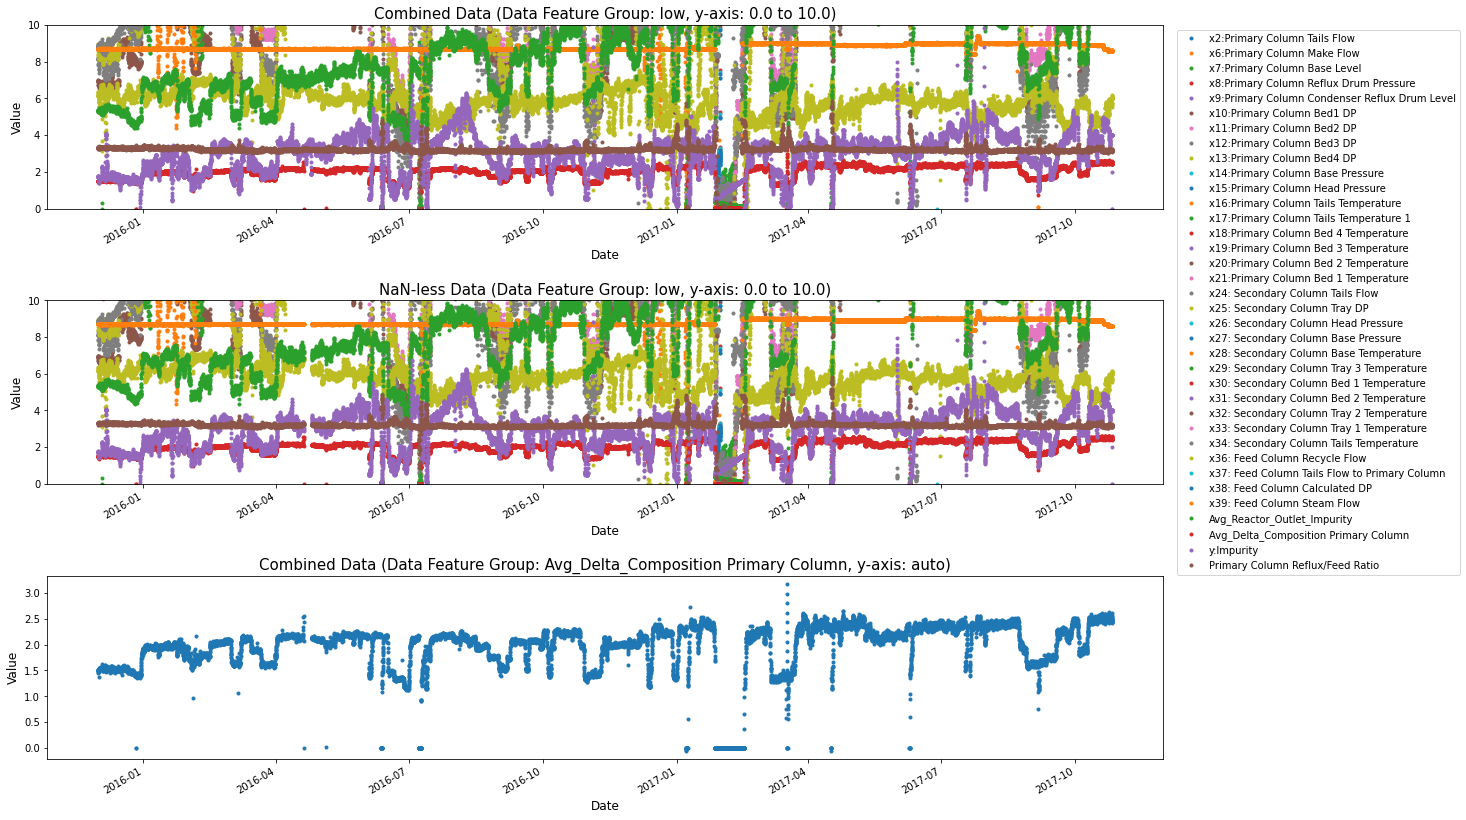

In [ ]:
#Used settings:
# df1:  combined data
# df2:  NaN-less data
# ft:   low
# df3:  combined data
# col3: Avg_Delta_Composition Primary Column
#range: (0,10)
show_df_comparison('Combined Data','NaN-less Data','low','Combined Data',\
                   'Avg_Delta_Composition Primary Column',0,10)

Looking at the combined dataframe vs the NaN-less one, the only distinguishable difference is the empty space created after deleting missing around May 2016. 


Looking closer at the combined dataframe around that time period in  the value=~2 range, we can see an empty bit of data for the series of red dots. Going through the legend and trying the 3 possible columns that correspond to that color in the third graph, we find that there indeed is some missing data for `Avg_Delta_Composition Primary Column`.

As for why the data was missing in the first place, given our understanding from the office hours that it is the difference between (product_from_primary - product_from_reactor), it may be due to the malfunctioning of equipment used to measure the product% either exiting the reactor, primary column, or both. This is because all other relevant data in the given dataframe (which are flowrates in/out of the feed and primary column, as well as impurity readings from both reactor and primary column) act normal during this time frame.

However, the previous reasoning would be incorrect if the instrument used to measure impurity% is also used to measure product%. In such a case data corruption might be another possibility

Moving on to the outliers seperation, we looked at the IQR-score and Z-score filtered dataframes and compared it to a couple of the combined data most jarring outliers:

First against the `Primary Col Refl/Feed Ratio`:

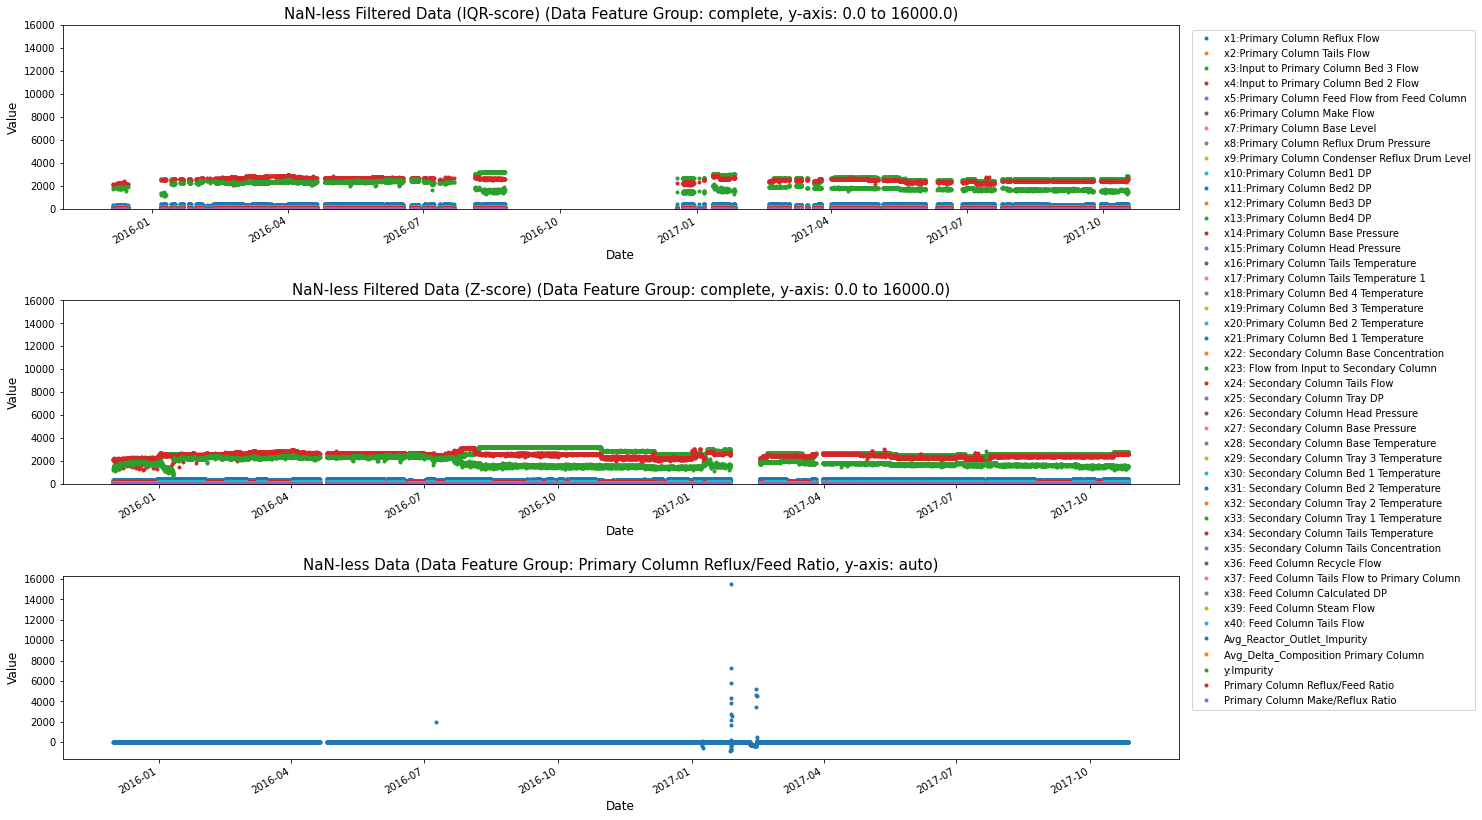

In [ ]:
#Used settings:
# df1:  filtered iqr-score
# df2:  filtered z-score
# ft:   complete
# df3:  NaN-less df
# col3: Primary Col Refl/Feed Ratio
#range: (0,16000) (full view) 
show_df_comparison('NaN-less Filtered Data (IQR-score)',\
                   'NaN-less Filtered Data (Z-score)','complete','NaN-less Data',\
                   'Primary Column Reflux/Feed Ratio',0,16000)

Then against the `x23: Flow from Input to Secondary Column`:

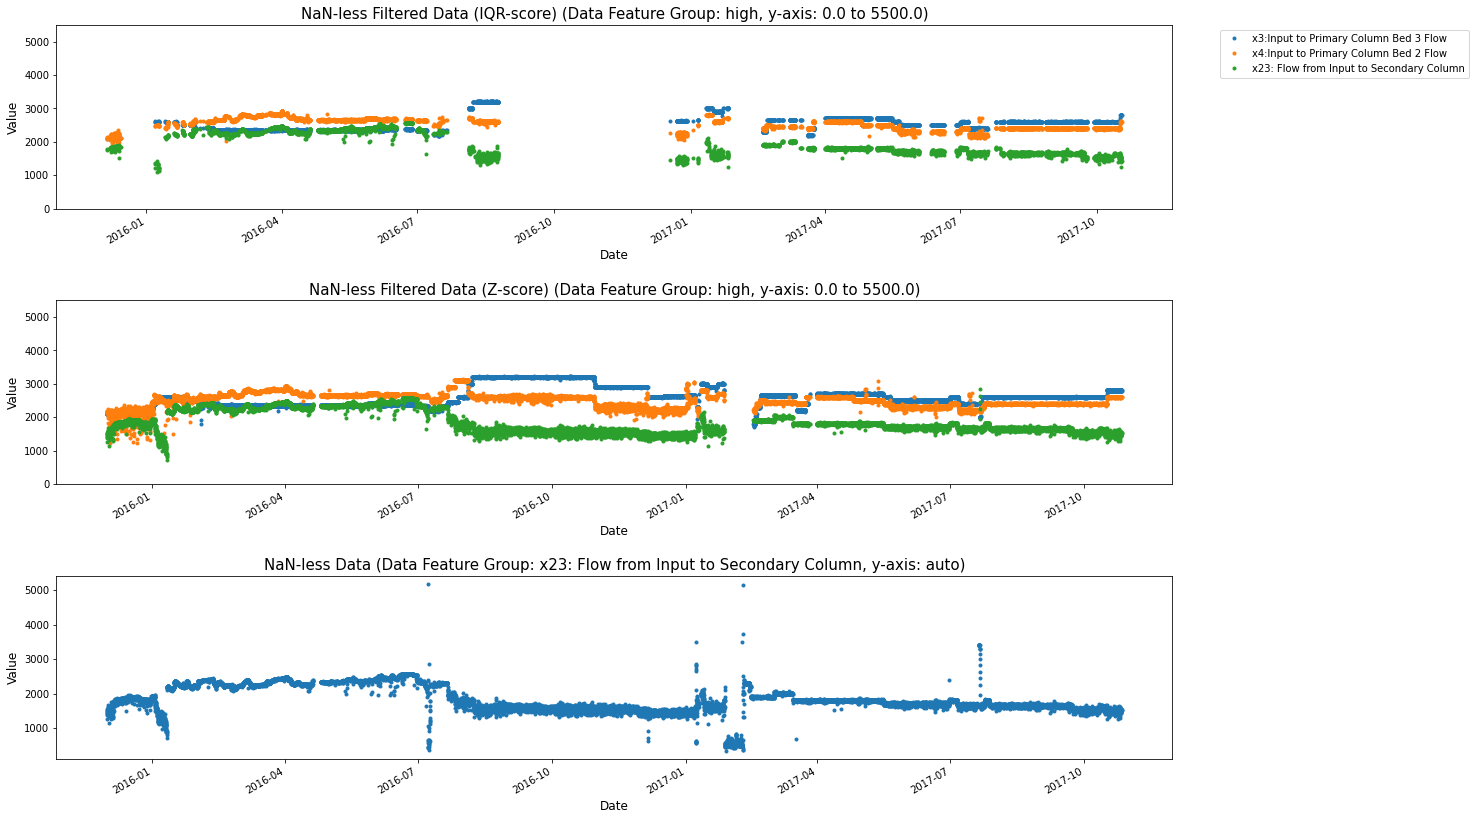

In [ ]:
#Used settings:
# df1:  filtered iqr-score
# df2:  filtered z-score
# ft:   high
# df3:  NaN-less df
# col3: 'x23: Flow from Input to Secondary Column'
#range: (0,5500)
show_df_comparison('NaN-less Filtered Data (IQR-score)','NaN-less Filtered Data (Z-score)','high','NaN-less Data','x23: Flow from Input to Secondary Column',0,5500)

Comparing the two methods while cycling through the data feature groups, the IQR-score method produces less sporatic data points than the Z-score method, and can be considered a better model for the available timeframes than its counterpart. However, given how much of the data is missing for certain timeframes (such as the gap between Sep 2016 to early Dec 2016), the IQR-model is too sparse of data to safely presume that it can represent the entire timespan properly, while the Z-model most certainly can. As such, the Z-model would be the better dataframe overall.

Even if the z-score is more sporatic, it still does a good job removing the most noticeable outliers. From the graphs above, both the z-score and IQR method managed to remove the giant spike up to 16000 caused by the `Primary Column Reflux/Feed Ratio` and the sudden-drop line of `x23: Flow from Input to Secondary Column` around Feb 2017. Furthermore, other spike-outliers seen on `x23: Flow from Input to Secondary Column` were also removed.

Besides the two columns above, other columns/variables also go through the same formatting (As seen in the box plot below), which we conclude to be a success. Even at the cost of removing all the other usable data from other variables from the removed time period - particularly around Feb 2017 - the dataframe (z-model, at least) as a whole should still be good for predictive and correlative analysis as it still maintains the general characteristics of the original dataframe.


#####**1.4.1.1.1** Outlier Removal Process Visualized (Scatter Plot)

Here is a code block that visualizes what data gets removed based on the bound lines; Red is the upper bound; Blue is the mean; Magenta is the lower bound. 

In [ ]:
#Code made while tinkering, don't have time to add proper comments
def var_scatter(z_method=list(nonan_ol_z_1var_dfdict.keys()),iqr_method=list(nonan_ol_iqr_1var_dfdict.keys())):
  fig,ax = plt.subplots(2,1,figsize=(20,10))
  ax[0].plot(nonan_ol_z_1var_dfdict[z_method][z_method],ls='',marker='.',c='k')
  ax[0].set_title(f'{z_method} (Z-score Method, {nonan_ol_z_1var_dfdict[z_method].shape[0]} entries)')
  ax[0].set_xlim([datetime.date(2015,12,1), datetime.date(2017,10,26)])
  z_col = no_nan_df[z_method]
  z_upper_bound = z_col.mean() + z_col.std() * threshold
  z_lower_bound = z_col.mean() - z_col.std() * threshold
  ax[0].axhline(y= z_col.mean(), c='b')
  ax[0].axhline(y= z_upper_bound, c='r')
  ax[0].axhline(y= z_lower_bound, c='m')
  ax[1].plot(nonan_ol_iqr_1var_dfdict[iqr_method][iqr_method],ls='',marker='.',c='k')
  ax[1].set_title(f'{iqr_method} (IQR-score Method, {nonan_ol_iqr_1var_dfdict[iqr_method].shape[0]} entries)')
  ax[1].set_xlim([datetime.date(2015,12,1), datetime.date(2017,10,26)])
  iqr_col = no_nan_df[iqr_method]
  q1_temp = no_nan_df[iqr_method].quantile(0.25)
  q3_temp = no_nan_df[iqr_method].quantile(0.75)
  iqr_temp = q3_temp - q1_temp
  iqr_upper_bound_temp = q3_temp + iqr_temp*iqr_multiplier
  iqr_lower_bound_temp = q1_temp - iqr_temp*iqr_multiplier
  ax[1].axhline(y= iqr_col.mean(), c='b')
  ax[1].axhline(y= iqr_upper_bound_temp, c='r')
  ax[1].axhline(y= iqr_lower_bound_temp, c='m')

interact(var_scatter)

interactive(children=(Dropdown(description='z_method', options=('x1:Primary Column Reflux Flow', 'x2:Primary C…

<function __main__.var_scatter>

####**1.4.1.2** Outlier Removal Results Visualized (Box Plot)

A common method to visualize outliers is using a **Box Plot** or box-and-whisker plot. [general desc. of plot type]

In our case, we can compare and contrast our original and 'outlier-less' dataframes using seperate box plots to see if we were able to remove most of the outliers using the z-score and IQR-score methods.

In [ ]:
#general format copied from tutorial 4
# we call the boxplot method by setting the kind parameter to 'box' within 
# dataframe.plot()
def show_box(lower,upper,df=list(df_dict.keys()),df2=list(df_dict.keys()),ft=list(ft_dict.keys()),):
  """
  creates and compares two box plots of dataframe depending on data feature group used
  \.
  lower, upper:
    lower and upper limits of the y-axis
  df:
    the dataframe from the dictionary 'df_dict'
  ft:
    the feature data groups from the dictionary 'ft_dict'
  """
  fig, ax = plt.subplots(1, 2, figsize = (40, 5))
  df_dict[df][ft_dict[ft]].plot(kind='box', ax=ax[0])
  ax[0].set_ylim(lower,upper)
  ax[0].tick_params(axis='x', rotation=90)
  ax[0].set_title(f'{df} Box Plot',fontsize=15)
  df_dict[df2][ft_dict[ft]].plot(kind='box', ax=ax[1])
  ax[1].set_ylim(lower,upper)
  ax[1].tick_params(axis='x', rotation=90)
  ax[1].set_title(f'{df2} Box Plot',fontsize=15)
#interacts with the function
interact(show_box,lower=widgets.FloatSlider(min=-10,max=500),upper=widgets.FloatSlider(min=0.3,max=16000))

interactive(children=(FloatSlider(value=0.0, description='lower', max=500.0, min=-10.0), FloatSlider(value=0.3…

<function __main__.show_box>

Using the widget and setting df=Comnined (or NaN-less only) and df2 to either IQR or Z-score produces an expected outcome: less outliers in all feature data groups.

_Note_: figsize(40,10) is to accomodate the large feature data group 'low'

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


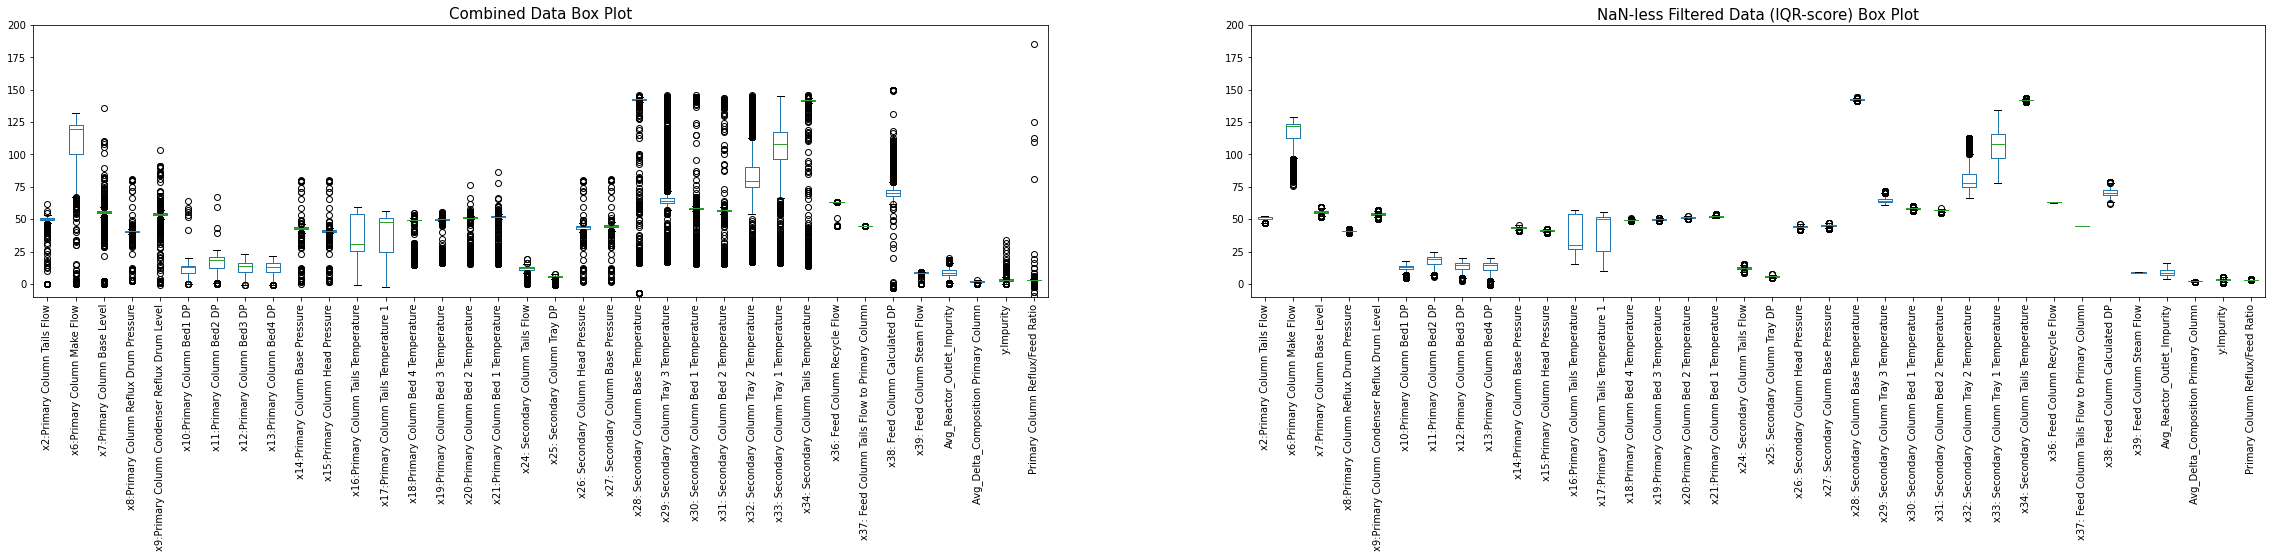

In [ ]:
show_box(-10,200,'Combined Data','NaN-less Filtered Data (IQR-score)','low')

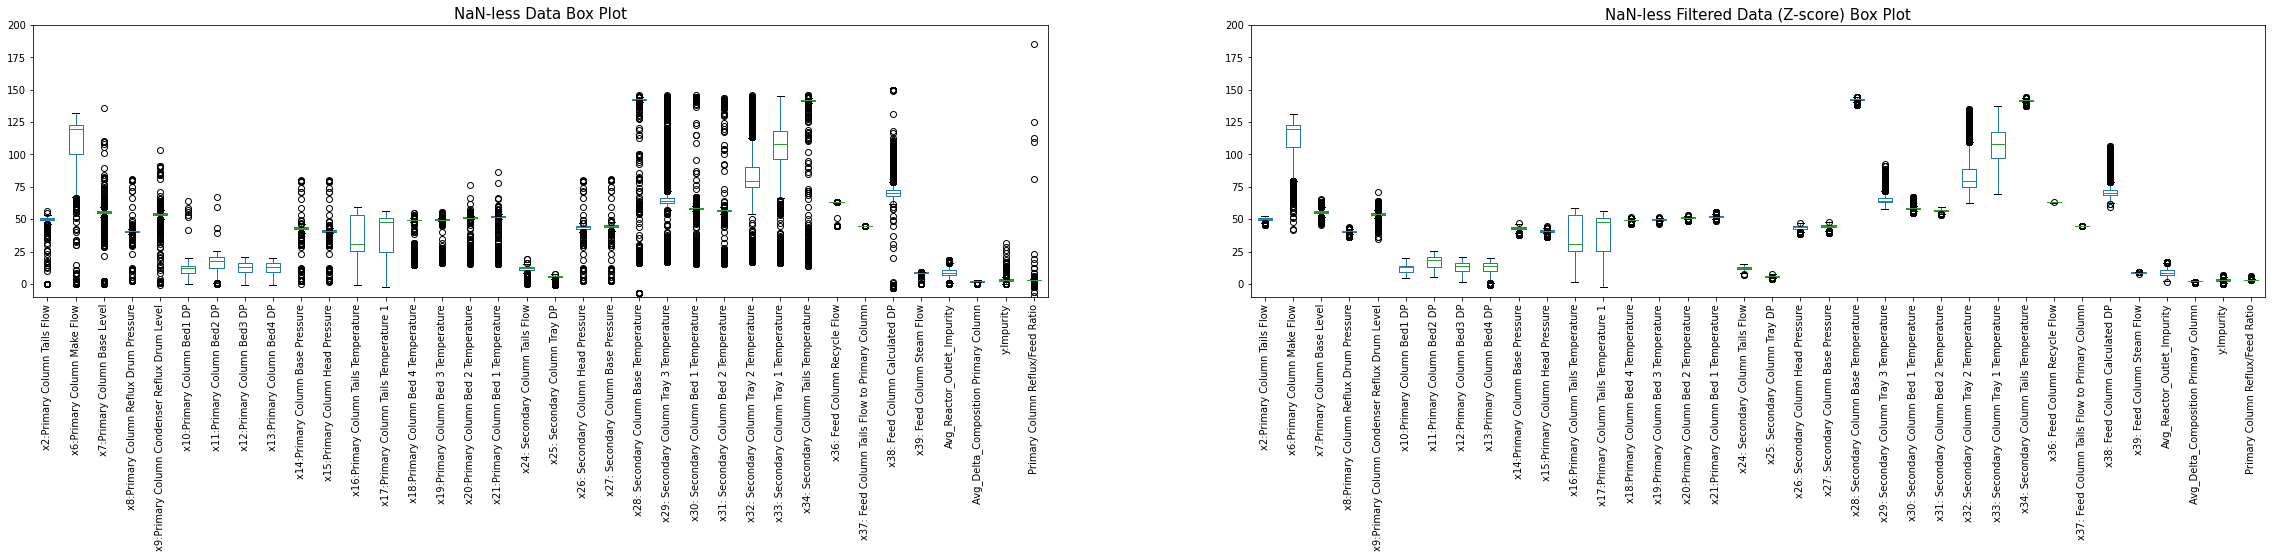

In [ ]:
show_box(-10,200,'NaN-less Data','NaN-less Filtered Data (Z-score)','low')

While side-by-side comparisons give a better grasp of the magnitude of how much the outliers have been removed by setting the y-axis limits to be the same, a comparing individual variables between the IQR and Z dataframes should use a top-bottom comparison for easier analysis.

This can be done more easily by copying the function `show_box` above, changing the figure shape around, and removing the x-labels of the top graph (the x-label for each variable is the same as the x-label from the graph below it).

As such, we've made the function `show_box_vert' and show the Z-model above and IQR-model below:

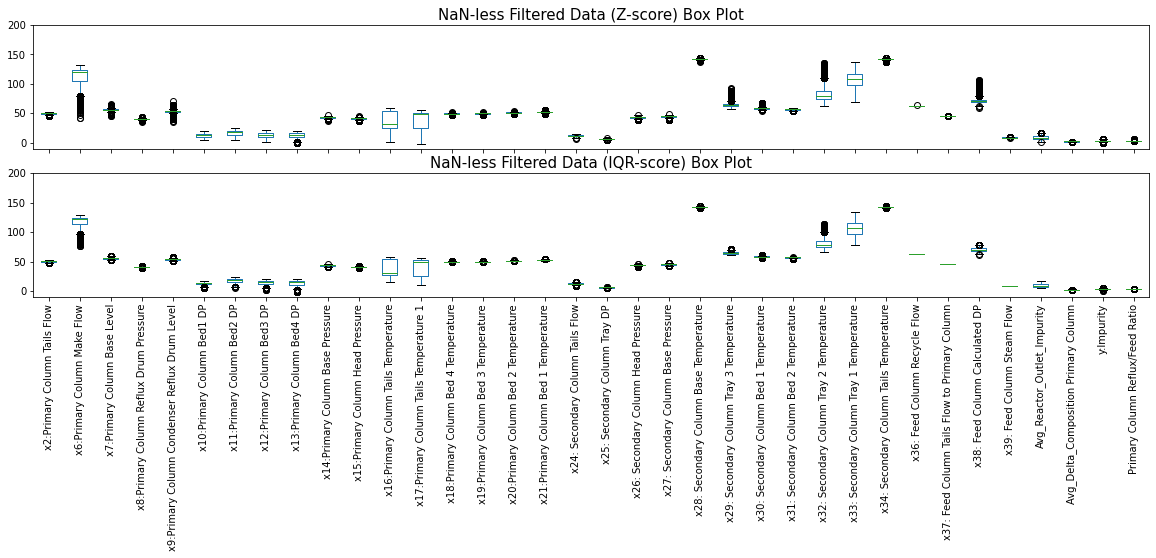

In [ ]:
#general format copied from tutorial 4
# we call the boxplot method by setting the kind parameter to 'box' within 
# dataframe.plot()
def show_box_vert(lower,upper,df=list(df_dict.keys()),df2=list(df_dict.keys()),ft=list(ft_dict.keys()),):
  """
  creates and compares two box plots of dataframe depending on data feature group used
  now vertical
  \.
  lower, upper:
    lower and upper limits of the y-axis
  df:
    the dataframe from the dictionary 'df_dict'
  ft:
    the feature data groups from the dictionary 'ft_dict'
  """
  fig, ax = plt.subplots(2, 1, figsize = (20, 5))
  df_dict[df][ft_dict[ft]].plot(kind='box', ax=ax[0])
  ax[0].set_ylim(lower,upper)
  ax[0].tick_params(axis='x',labelbottom=False)
  ax[0].set_title(f'{df} Box Plot',fontsize=15)
  df_dict[df2][ft_dict[ft]].plot(kind='box', ax=ax[1])
  ax[1].set_ylim(lower,upper)
  ax[1].tick_params(axis='x', rotation=90)
  ax[1].set_title(f'{df2} Box Plot',fontsize=15)

show_box_vert(-10,200,'NaN-less Filtered Data (Z-score)','NaN-less Filtered Data (IQR-score)','low')

At a glance, the IQR-model and Z-model appear to be getting similar quartiles and means, and IQR has less outliers, specifically at x6, x29 and x38 from the 'low' features group

Despite the fact that we cannot further analyse the data due to time constraints, further analysis can be done with the interactive widget below:

In [ ]:
interact(show_box_vert,lower=widgets.FloatSlider(min=-10,max=500,value=-10),upper=widgets.FloatSlider(min=0.3,max=16000,value=200))

interactive(children=(FloatSlider(value=-10.0, description='lower', max=500.0, min=-10.0), FloatSlider(value=2…

<function __main__.show_box_vert>

###**1.4.2** Cluster Identification (Scatter plot)

gives comprehension of data compared to one another in a column if set bot x and y values to the same column, in which data points on the y=x line that are far away from the dense cluster are visually considered outliers

In [ ]:
#Decided to compare the column values to consider how they are correlated
#Can be compared to Impurities
  #to check how important a column is to the build up of Impurities
#can also be used to compare against itself
  #to get an idea of where outliers may be
#for now use nonan_nool_z_df, later make it so that can switch between dataframes


#making an interactive scatter plot comparsion between the y:Impuritiy values and any x on the list
#along with its correlation
def scatter_comparison(df=list(df_dict.keys()),variable_x=combined_df.columns,variable_y=combined_df.columns,yx=True):
  """
  Creates a scatter plot between 2 variable/columns you choose.
  Intended for Interactive usage using Ipywidget's interact module.
  Uses the dataframe 'no_nan_df' now nonan_nool_z_df, now nonan_ol_z_df
  ---
  variable_x: str
    any column on the ImpurityTraining.csv file
    Plots on the x-axis
  variable_y: str
    any column on the ImpurityTraining.csv file
    Plots on the x-axis
  """
  #if there are any mistakes/simplifications/clarifications that can be made
  #please do so and make comments on the edit

  #setting variables
  varx_values = df_dict[df][variable_x]
  vary_values = df_dict[df][variable_y]
  correlation = df_dict[df].corr()[variable_x][variable_y]
  #making the plot
  fig, ax = plt.subplots(1,1,figsize=(10,5))
  ax.plot(varx_values,vary_values,ls='',marker='.')
  ax.set_title(f'{variable_y} vs {variable_x} (corr {correlation})',fontsize=15)
  ax.set_ylabel(variable_y,fontsize=15)
  ax.set_xlabel(variable_x,fontsize=15)
  #creating a y = x line
  if bool(yx):
    xpoints = ypoints = ax.get_xlim()
    ax.plot(xpoints, ypoints, linestyle='--', scalex=False, scaley=False)
  else:
    pass
  #not sure why I added this, but prints the title
  print(ax.title)

In [ ]:
#interacts with the function  
interact(scatter_comparison)

interactive(children=(Dropdown(description='df', options=('Combined Data', 'NaN-less Data', 'NaN-less Filtered…

<function __main__.scatter_comparison>

###**1.4.3** Correlation Visualization (Heatmaps)

Heatmaps return a color that corresponds to how large or small the value is, which is why it is commonly used to show correlation between variables. Our outlier-removed dataframes decreases the noise from outliers that may make two variables seem more/less correlated than they actually are, giving a better idea of what variables are actually correlated.

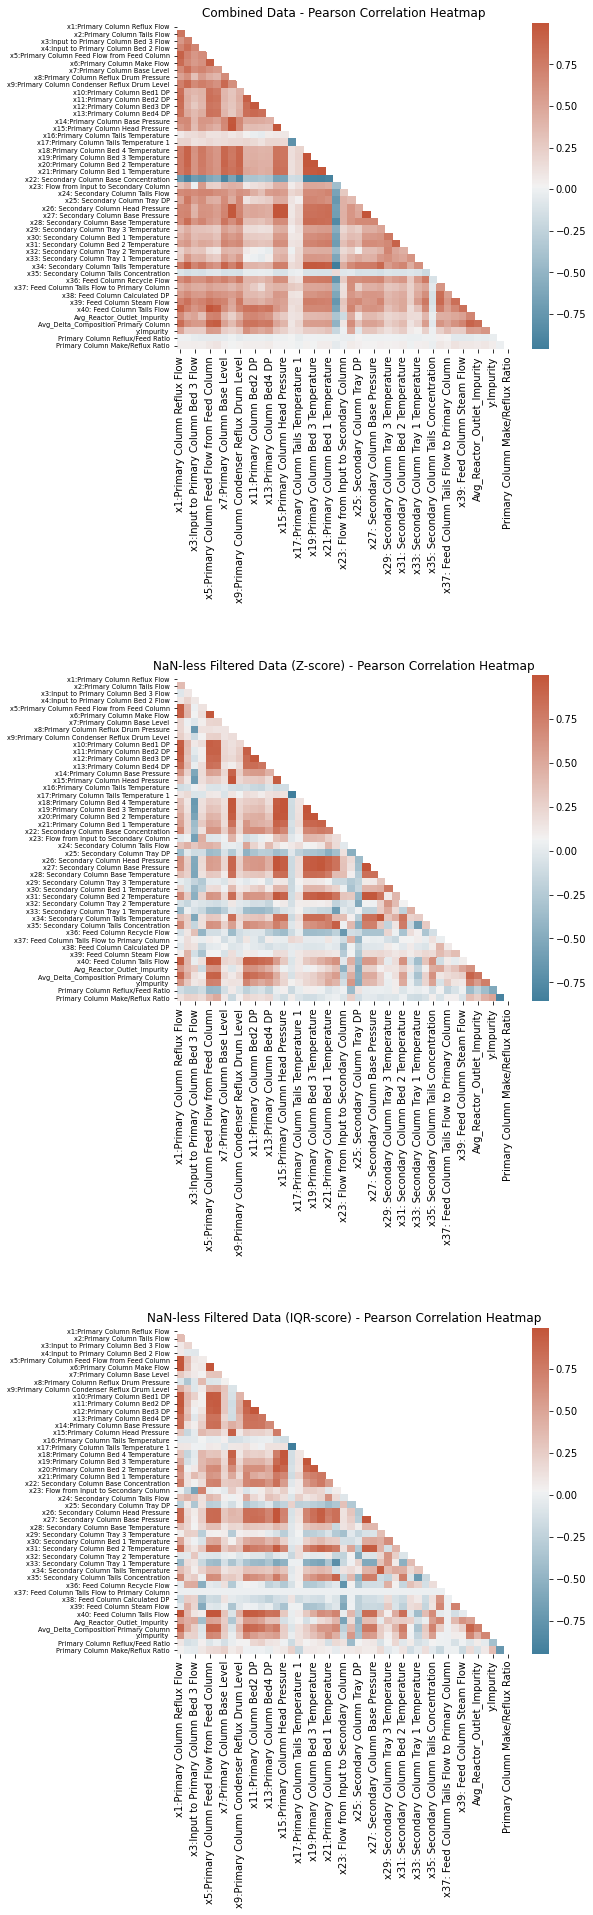

In [ ]:
#copy-pasted from tutorial 4
fig, ax = plt.subplots(3, 1, figsize = (7.5,30))
# create a mask to white-out the upper triangle
mask1 = np.triu(np.ones_like(combined_df.corr(), dtype=bool))
mask2 = np.triu(np.ones_like(nonan_nool_z_df.corr(), dtype=bool))
mask3 = np.triu(np.ones_like(nonan_nool_iqr_df.corr(), dtype=bool))

# we'll want a divergent colormap for this so our eye
# is not attracted to the values close to 0
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(combined_df.corr(), mask=mask1, cmap=cmap, ax=ax[0])
ax[0].set_title('Combined Data - Pearson Correlation Heatmap')
ax[0].tick_params(axis='y',labelsize=6.5)
sns.heatmap(nonan_nool_z_df.corr(), mask=mask2, cmap=cmap, ax=ax[1])
ax[1].set_title('NaN-less Filtered Data (Z-score) - Pearson Correlation Heatmap')
ax[1].tick_params(axis='y',labelsize=6.5)
sns.heatmap(nonan_nool_iqr_df.corr(), mask=mask3, cmap=cmap, ax=ax[2])
ax[2].set_title('NaN-less Filtered Data (IQR-score) - Pearson Correlation Heatmap')
ax[2].tick_params(axis='y',labelsize=6.5)
plt.subplots_adjust(hspace=1)
#|weak|<0.3=|moderate|<0.7=|strong|

Anything approaching red has a positive correlation, while anything approaching blue has a negative correlation; both of which are still correlations. Anything gray to white (in between), is considered weakly correlated or not correlated at all. (|weak|<0\.3=|moderate|<0.7=|strong|)

From a chemical standpoint, values such as the primary column beds and temperatures should be highly correlated. The same goes for Impurities to the average reactor outlet impurity, among many others.

Our removed-outlier dataframe manages to enhance all of these correlations, while making other most-probably unrelated variables less correlated (approach closer to zero, becomes more white and thus invisible).

Specifically, we are interested in the correlation of the variables to the Impurity, we can map that as well:

In [ ]:
#creating a heatmap for corr to y
def heatmap_y(df=list(df_dict.keys())):
  x_column_list = []
  imp_corr_list = []
  for i in range(df_dict[df].shape[1]):
    x_column_list.append(df_dict[df].columns[i])
    imp_corr_list.append(df_dict[df].corr()[nonan_nool_z_df.columns[i]]['y:Impurity'])
  imp_corr_df = pd.DataFrame({'Corr to Impurities': imp_corr_list},
                    index=x_column_list)
  imp_corr_df.sort_values(by='Corr to Impurities', ascending=False, inplace=True)
  fig, ax = plt.subplots(1, 1, figsize = (5,10))
  cmap1 = sns.diverging_palette(220, 20, as_cmap=True)
  sns.heatmap(imp_corr_df, annot=True,center=0,cmap=cmap1)
  ax.set_title(f'{df} - Column\'s Pearson\'s Correlation to \'y:Impurity\'')
  plt.show()

interact(heatmap_y)

interactive(children=(Dropdown(description='df', options=('Combined Data', 'NaN-less Data', 'NaN-less Filtered…

<function __main__.heatmap_y>

From the outlier-less Z-score dataframe, we see that Impurity is highly correlated to the values above 0.7

#**X.** Scratch Notes

Extra code that was made fiddling around with the widgets and data that had no time to be corrected/added to the main list.

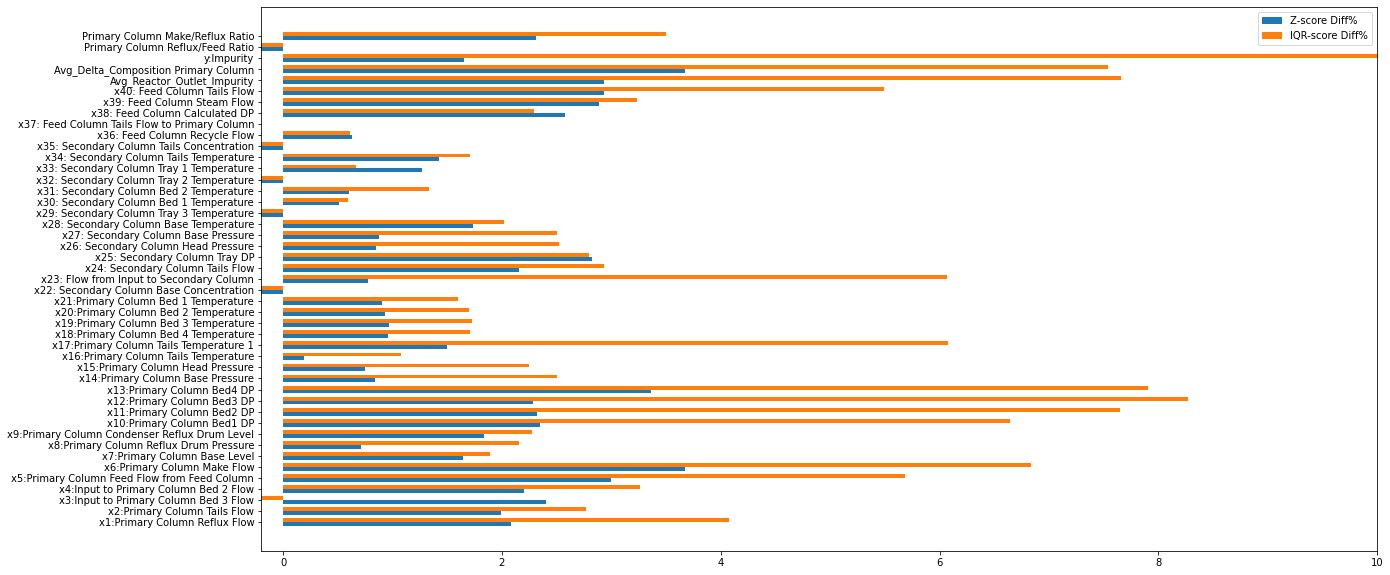

In [ ]:
#creating dataframe between mean differences before and after nan and outlier
#comparing z-score% diff and IQR-score% diff on a plot
mean_dif1_variable = []
mean_dif1_combined_mean = []
mean_dif1_no_nan_mean = []
mean_dif1_z_mean = []
mean_dif1_iqr_mean = []
mean_dif1_z_diff = []
mean_dif1_iqr_diff = []
for i in range(nonan_nool_z_df.shape[1]):
  mean_dif1_variable.append(nonan_nool_z_df.columns[i])
  mean_dif1_combined_mean.append(combined_df.mean()[i])
  mean_dif1_no_nan_mean.append(no_nan_df.mean()[i])
  mean_dif1_z_mean.append(nonan_nool_z_df.mean()[i])
  mean_dif1_iqr_mean.append(nonan_nool_iqr_df.mean()[i])
  mean_dif1_z_diff.append(100*(nonan_nool_z_df.mean()[i] - combined_df.mean()[i])/combined_df.mean()[i])
  mean_dif1_iqr_diff.append(100*(nonan_nool_iqr_df.mean()[i] - combined_df.mean()[i])/combined_df.mean()[i])
mean_dif1_data = {'Variable': mean_dif1_variable, 'Combined': mean_dif1_combined_mean,\
                 'No NaN': mean_dif1_no_nan_mean,'Z-score': mean_dif1_z_mean,\
                 'IQR-score':mean_dif1_iqr_mean,\
                 'Z-score Diff%':mean_dif1_z_diff,'IQR-score Diff%':mean_dif1_iqr_diff}
mean_dif1_df = pd.DataFrame(data=mean_dif1_data)
#mean_dif1_df.set_index('Variable',inplace=True)
#mean_dif1_df.drop(columns=['Combined','No NaN','Z-score','IQR-score'])
fig, ax = plt.subplots(1,1,figsize=(20,10))
labels = mean_dif1_df['Variable']
x = np.arange(len(labels))
width = 0.35
ax.barh(x - width/2, mean_dif1_df['Z-score Diff%'], width, label='Z-score Diff%')
ax.barh(x + width/2, mean_dif1_df['IQR-score Diff%'], width, label='IQR-score Diff%')
ax.set_xlim(-0.2,10)
#ax.axhline(color='r')
plt.yticks(x,labels=labels,rotation=0)
plt.legend()

In [ ]:
#previously only nonan_nool_z_df, now added other functions
def single_var(df=list(df_dict.keys()),ft=list(ft_dict.keys())):
  """show's a single var from a the 'df_dict' dataframe list"""
  fig, ax = plt.subplots(1,1,figsize=(20,10))
  df_dict[df][ft_dict[ft]].plot(ax=ax,ls='',marker='.')

interact(single_var)

interactive(children=(Dropdown(description='df', options=('Combined Data', 'NaN-less Data', 'NaN-less Filtered…

<function __main__.single_var>

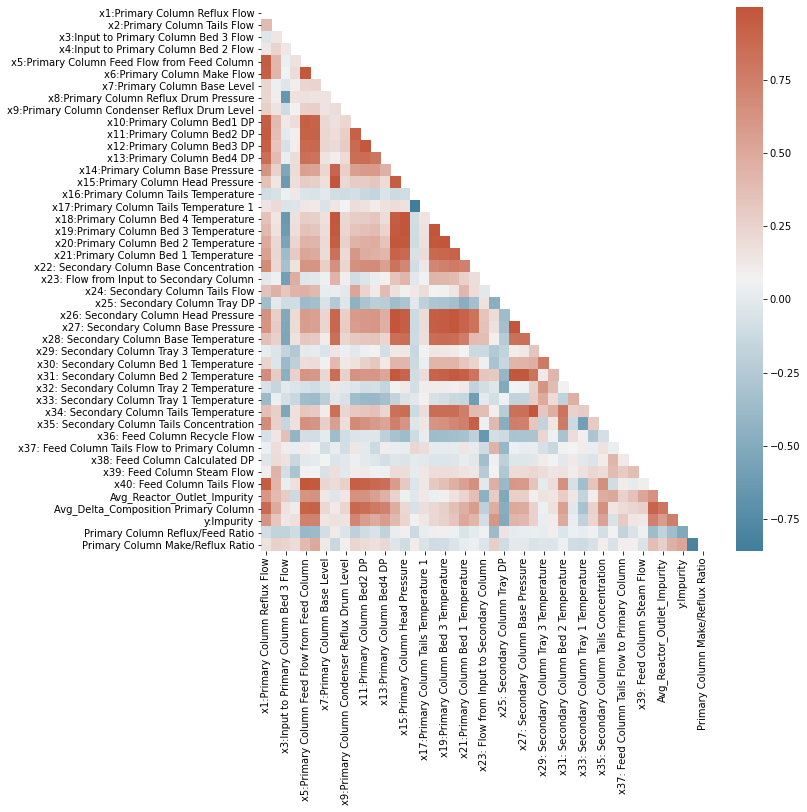

In [ ]:
#copy-pasted from tutorial 4
fig, ax = plt.subplots(1, 1, figsize = (10,10))

# create a mask to white-out the upper triangle
mask = np.triu(np.ones_like(combined_df.corr(), dtype=bool))

# we'll want a divergent colormap for this so our eye
# is not attracted to the values close to 0
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(nonan_nool_z_df.corr(), mask=mask, cmap=cmap, ax=ax)
#|weak|<0.3=|moderate|<0.7=|strong|

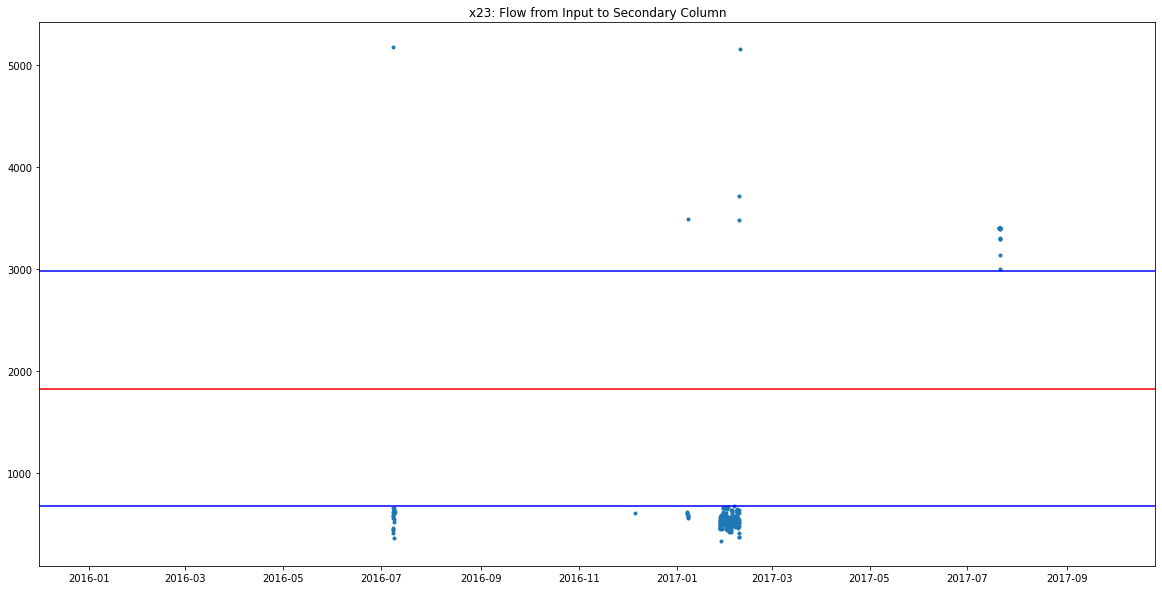

In [ ]:
var = 'x23: Flow from Input to Secondary Column'
import datetime
fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.plot(nonan_ol_z_1var_dfdict[var][var],ls='',marker='.')
ax.set_title(var)
ax.set_xlim([datetime.date(2015,12,1), datetime.date(2017,10,26)])
imp_col = no_nan_df[var]
ax.axhline(y=imp_col.mean(),color='r')
ax.axhline(y=imp_col.mean()+imp_col.std()*3,color='b')
ax.axhline(y=imp_col.mean()-imp_col.std()*3,color='b')